# 0. Preprocessing

In [5]:
library(Seurat)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [1]:
XMAS <- readRDS('~/Desktop/XMAS_analysis/outputs/MS_XMAS_relabeled.rds')

In [6]:
XMAS@meta.data <- XMAS@meta.data %>%
  mutate(bimod_oc_des = case_when(
    seurat_clusters_BiMod_OC == 15 ~ 'ProgFP.Development',
    TRUE ~ bimod_oc_des
  ))

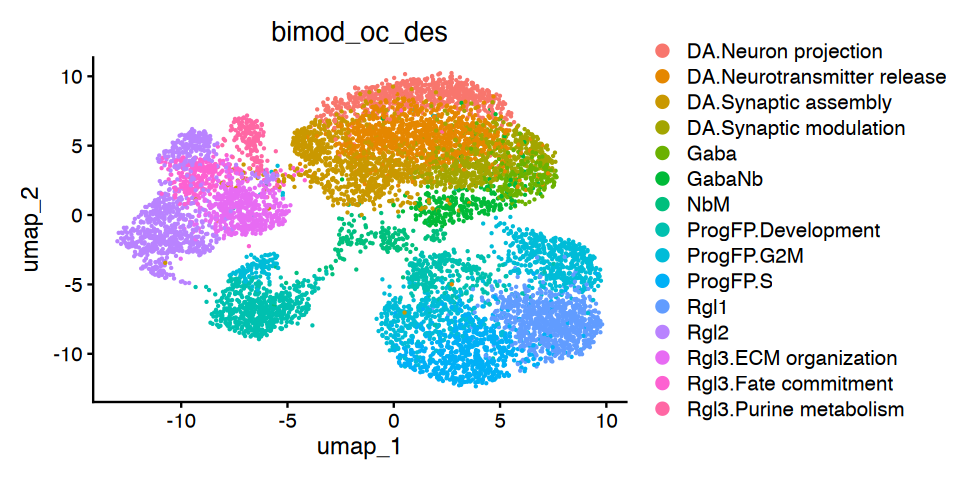

In [55]:
options(repr.plot.width=8, repr.plot.height=4)
DimPlot(XMAS, group.by='bimod_oc_des', reduction = 'umap')

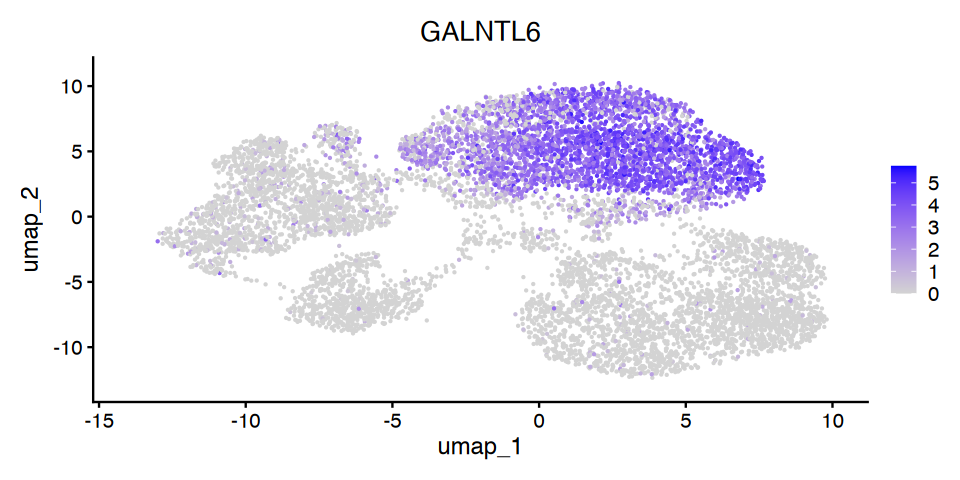

In [19]:
FeaturePlot(XMAS, features = 'GALNTL6', reduction = 'umap')

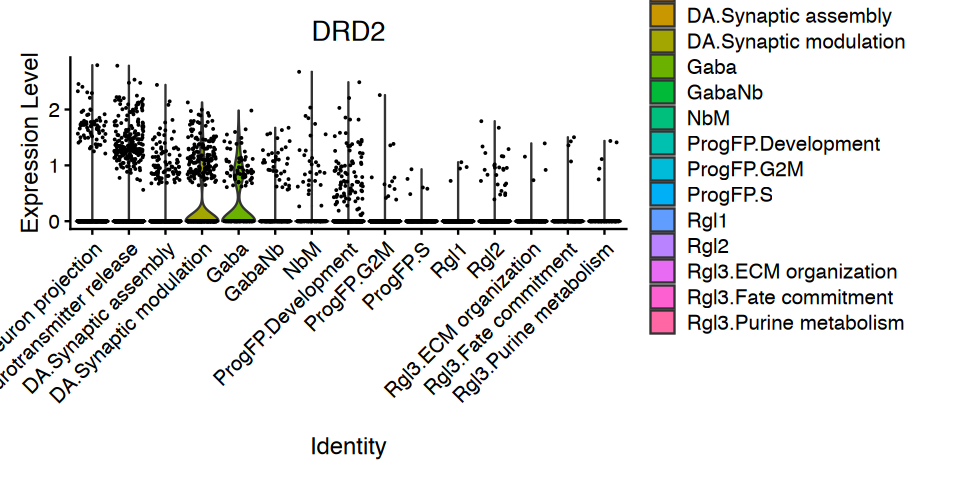

In [13]:
VlnPlot(XMAS, features = 'DRD2', group.by  = 'bimod_oc_des')

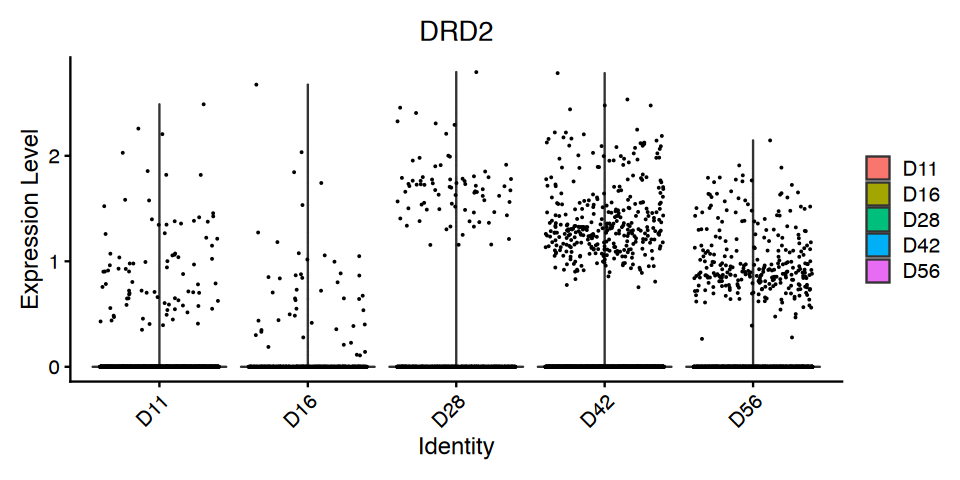

In [14]:
VlnPlot(XMAS, features = 'DRD2', group.by  = 'orig.ident')

# 1. Link peaks to genes

In [54]:
sec <- XMAS[,XMAS$bimod_oc %in% c('ProgFP','NbM','DA')]

In [78]:
DefaultAssay(sec) <- "peaks"
sec <- RegionStats(sec, assay = 'peaks', genome = BSgenome.Hsapiens.UCSC.hg38, verbose = T)

In [79]:
sec[["peaks"]]

ChromatinAssay data with 191154 features for 6066 cells
Variable features: 183156 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 5 

In [189]:
# Link peaks to genes
sec <- LinkPeaks(
  object = sec,
  peak.assay = "peaks",
  expression.assay = "RNA",
  genes.use = c("FOXA2", "LMX1A", "EN1", "NR4A2", "TH", "DDC", "OTX2", "SOX6", "KCNJ6", "CALB1", "LMO3", "DCX", "BNC2", "SLC18A2","PITX3")
)

Testing 15 genes and 186180 peaks



## 1.1 BIMOD_OC

In [162]:
Idents(object = sec) <- "bimod_oc"

Warning message:
"Removed 28 rows containing missing values or values outside the scale range
(`geom_segment()`)."


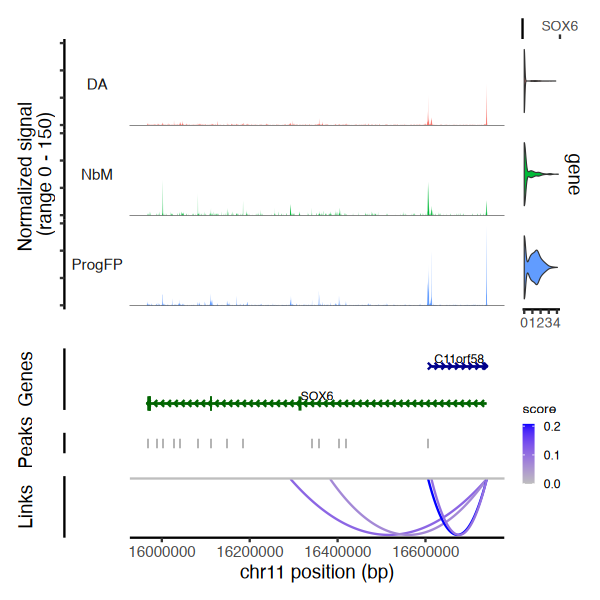

In [108]:
gene_marker = "SOX6"
options(repr.plot.width=5, repr.plot.height=5)
CoveragePlot(sec, region = gene_marker, features = gene_marker, 
             expression.assay = "RNA", tile = F, extend.upstream = 500, extend.downstream = 1000) + 
 theme(axis.text = element_text(size = 20)) +
labs(x = "", y= "")

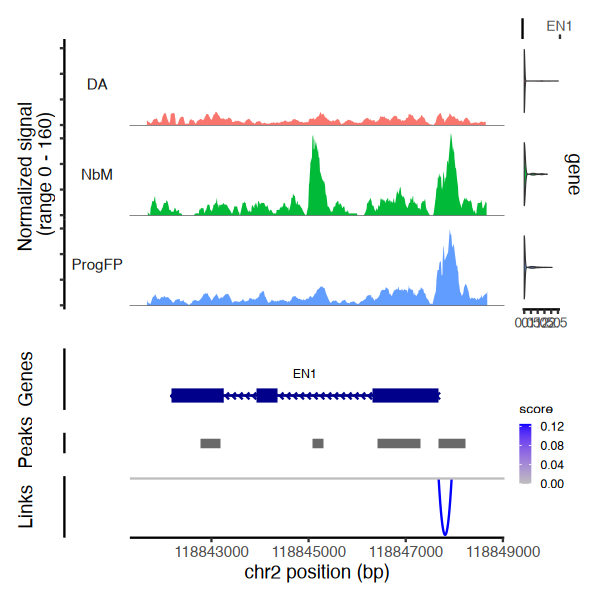

In [109]:
gene_marker = "EN1"
options(repr.plot.width=5, repr.plot.height=5)
CoveragePlot(sec, region = gene_marker, features = gene_marker, 
             expression.assay = "RNA", tile = F, extend.upstream = 500, extend.downstream = 1000) + 
 theme(axis.text = element_text(size = 20)) +
labs(x = "", y= "")

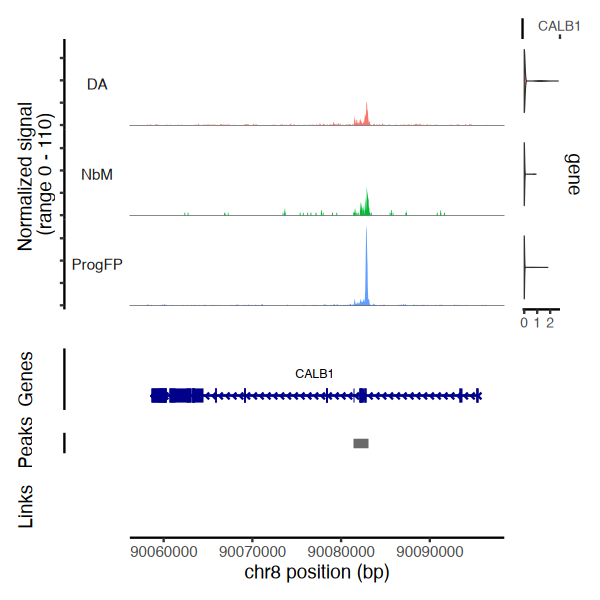

In [150]:
gene_marker = "CALB1"
options(repr.plot.width=5, repr.plot.height=5)
CoveragePlot(sec, region = gene_marker, features = gene_marker, 
             expression.assay = "RNA", tile = F, extend.upstream = 500, extend.downstream = 1000) + 
 theme(axis.text = element_text(size = 20)) +
labs(x = "", y= "")

Warning message:
"Removed 48 rows containing missing values or values outside the scale range
(`geom_segment()`)."


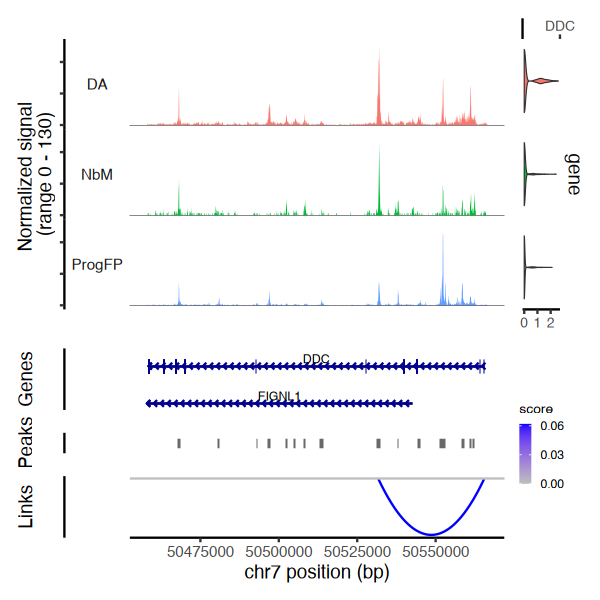

In [152]:
gene_marker = "DDC"
options(repr.plot.width=5, repr.plot.height=5)
CoveragePlot(sec, region = gene_marker, features = gene_marker, 
             expression.assay = "RNA", tile = F, extend.upstream = 500, extend.downstream = 1000) + 
 theme(axis.text = element_text(size = 20)) +
labs(x = "", y= "")

Warning message:
"Removed 28 rows containing missing values or values outside the scale range
(`geom_segment()`)."


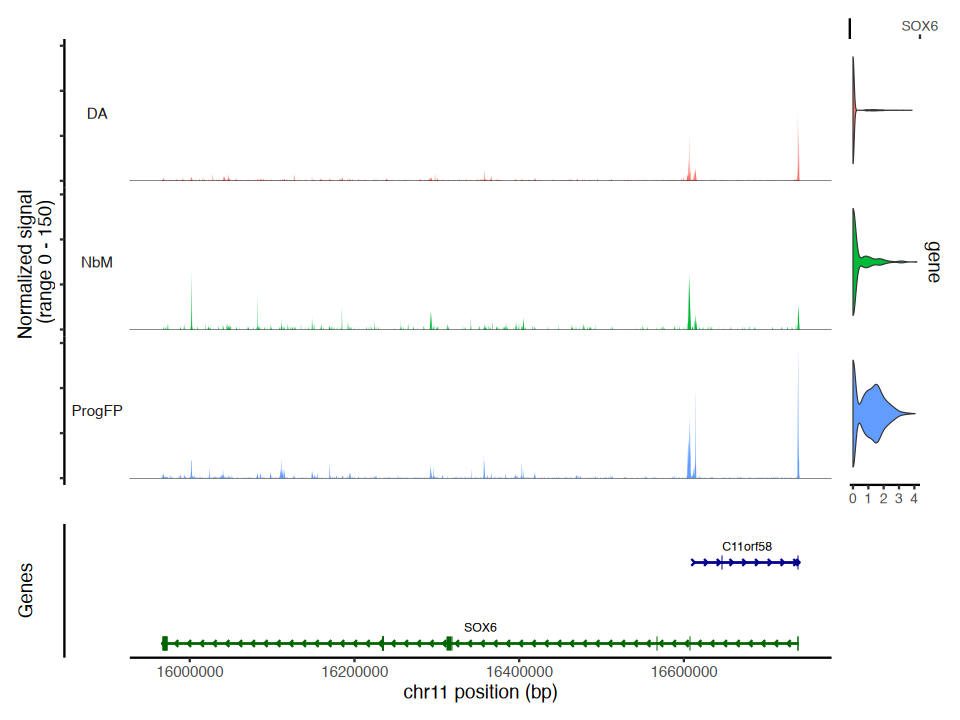

In [141]:
gene_marker = "SOX6"
options(repr.plot.width=8, repr.plot.height=6)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

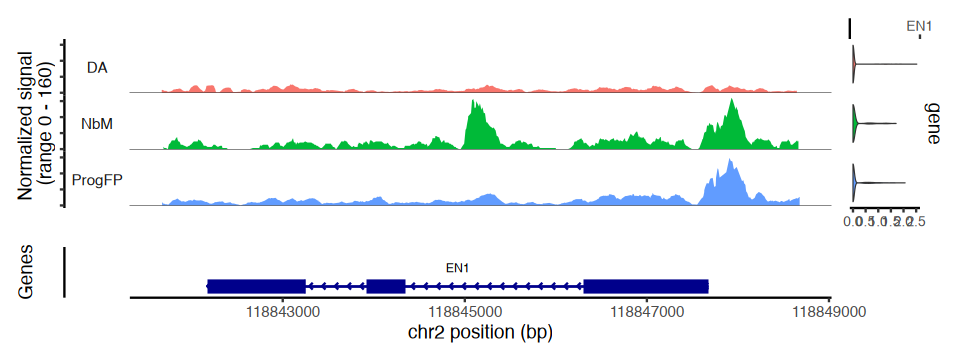

In [146]:
gene_marker = "EN1"
options(repr.plot.width=8, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

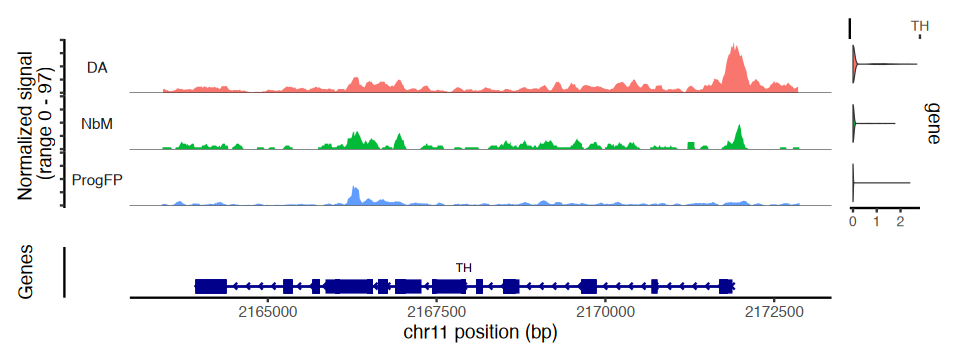

In [147]:
gene_marker = "TH"
options(repr.plot.width=8, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

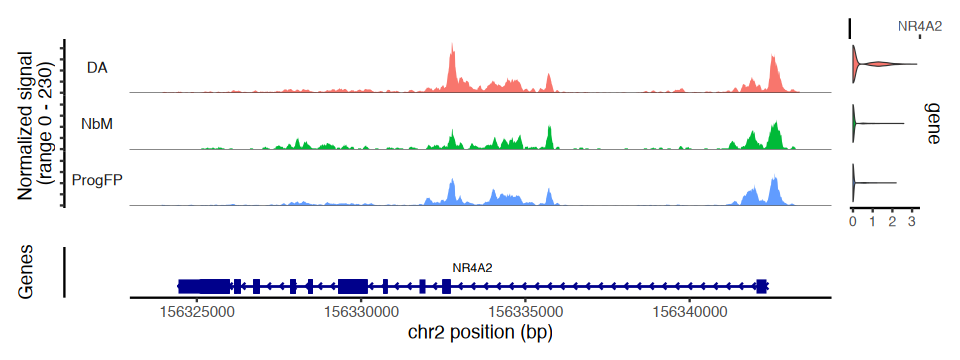

In [148]:
gene_marker = "NR4A2"
options(repr.plot.width=8, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
"Removed 13 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."


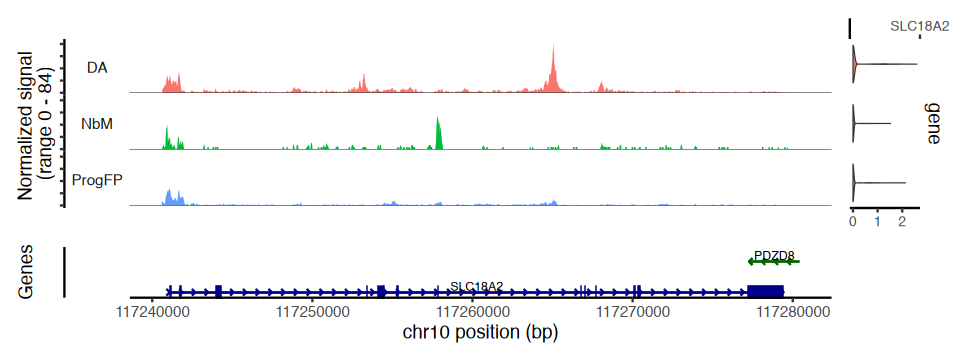

In [149]:
gene_marker = "SLC18A2"
options(repr.plot.width=8, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

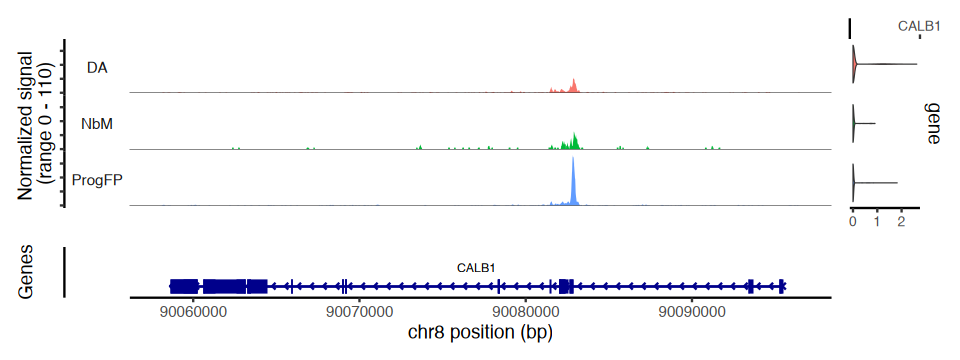

In [153]:
gene_marker = "CALB1"
options(repr.plot.width=8, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
"Removed 48 rows containing missing values or values outside the scale range
(`geom_segment()`)."


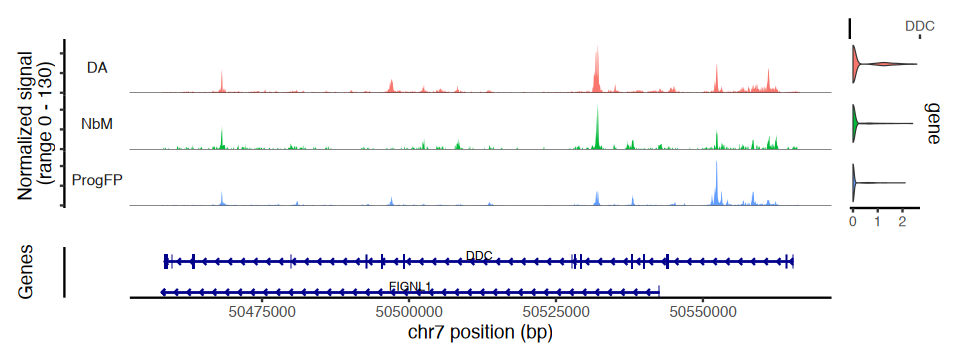

In [154]:
gene_marker = "DDC"
options(repr.plot.width=8, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

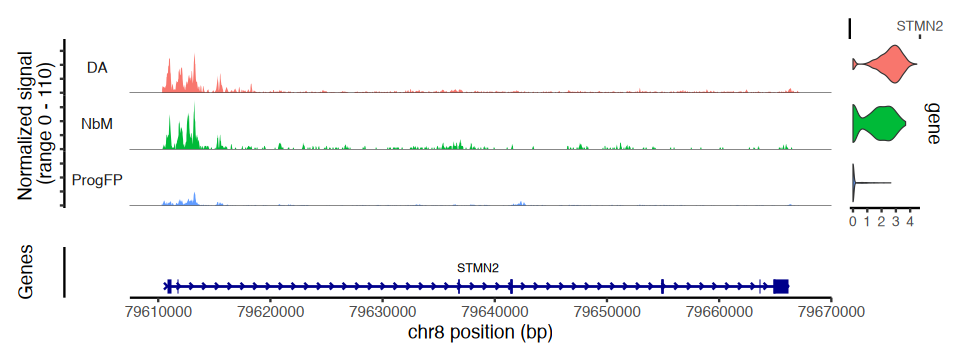

In [168]:
gene_marker = "STMN2"
options(repr.plot.width=8, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

## 1.2 BIMOD_OC_DES

In [156]:
Idents(object = sec) <- "bimod_oc_des"

Warning message:
"Removed 28 rows containing missing values or values outside the scale range
(`geom_segment()`)."


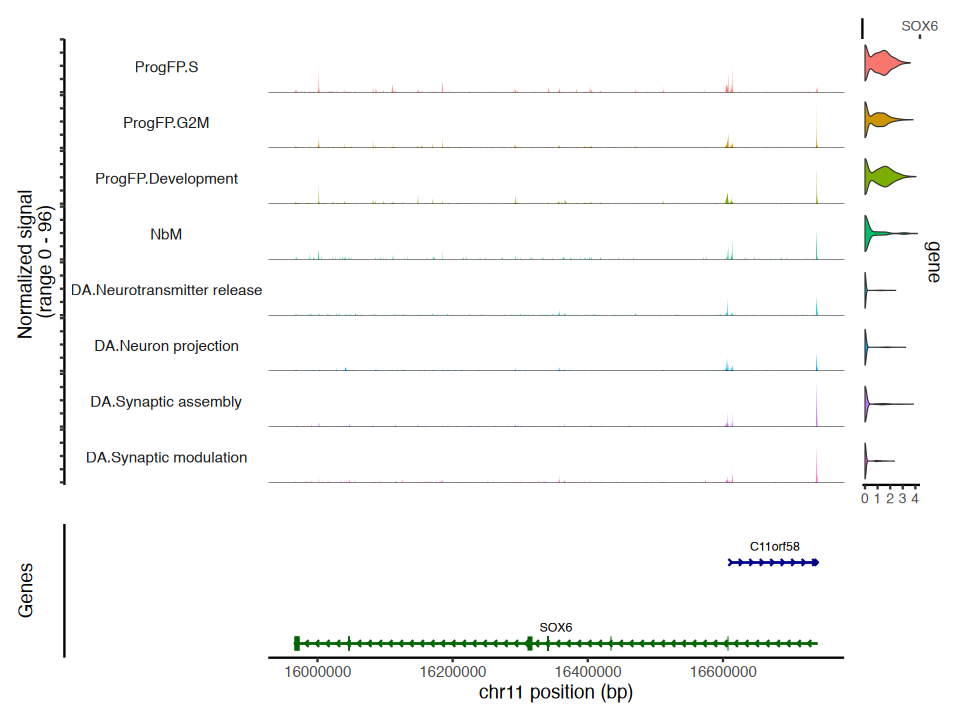

In [130]:
gene_marker = "SOX6"
options(repr.plot.width=8, repr.plot.height=6)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

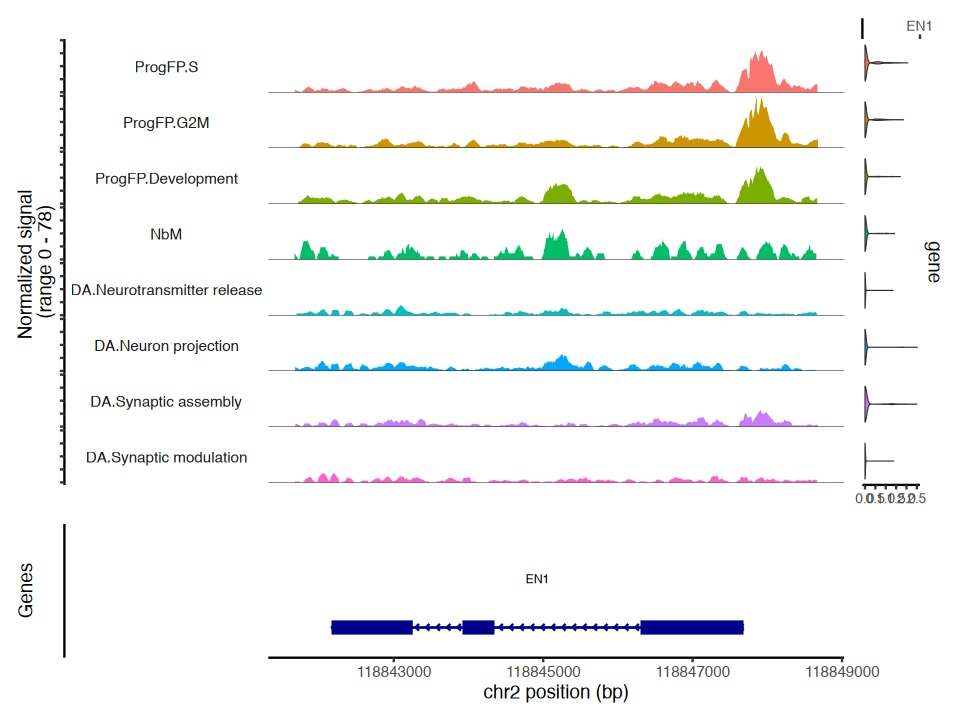

In [131]:
gene_marker = "EN1"
options(repr.plot.width=8, repr.plot.height=6)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

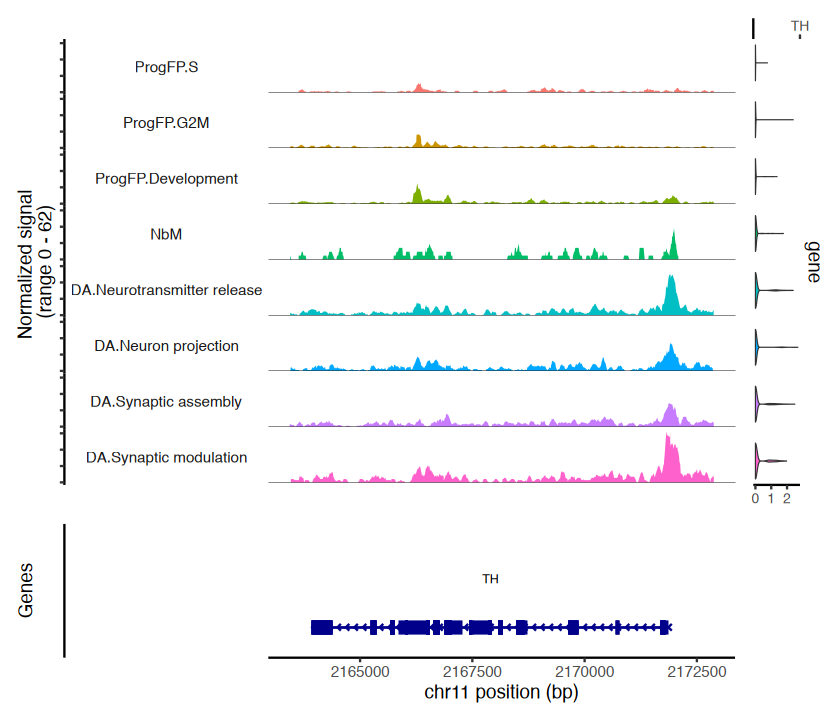

In [132]:
gene_marker = "TH"
options(repr.plot.width=7, repr.plot.height=6)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

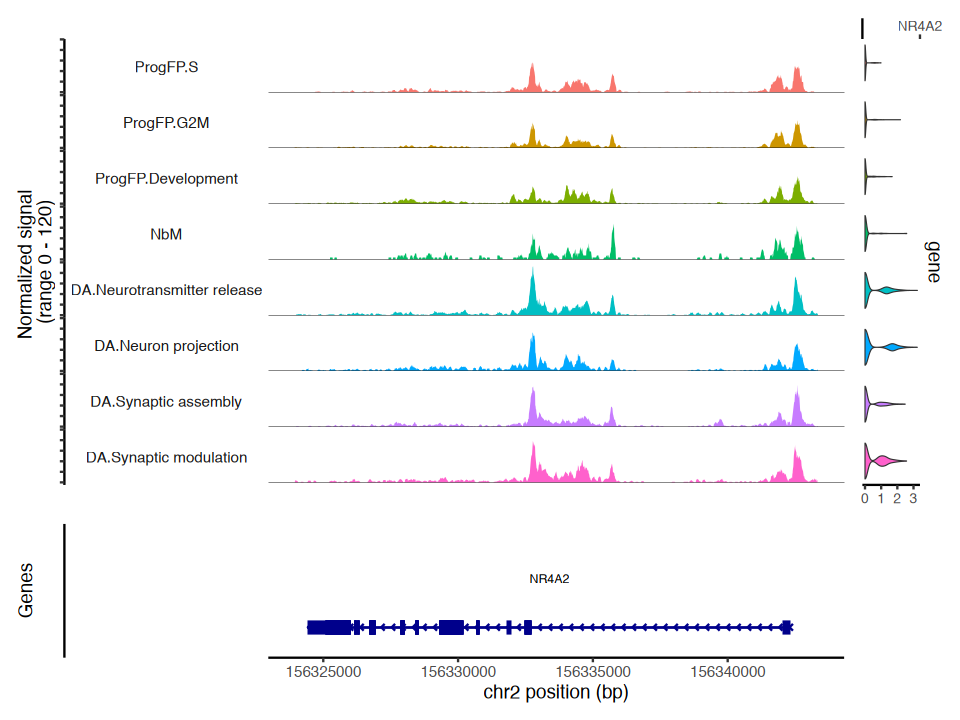

In [133]:
gene_marker = "NR4A2"
options(repr.plot.width=8, repr.plot.height=6)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
"Removed 13 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."


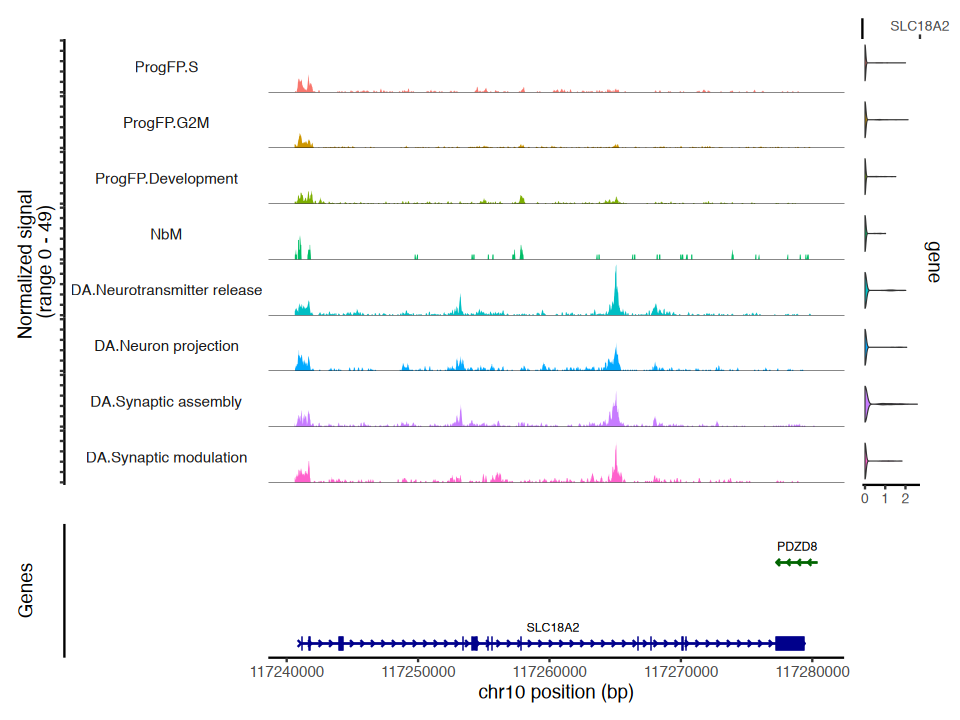

In [134]:
gene_marker = "SLC18A2"
options(repr.plot.width=8, repr.plot.height=6)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

## 1.3 For publication

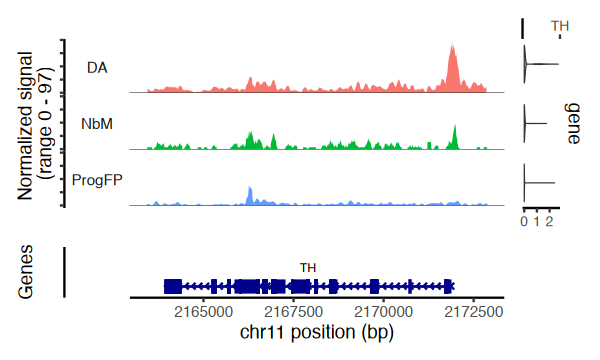

In [169]:
gene_marker = "TH"
options(repr.plot.width=5, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

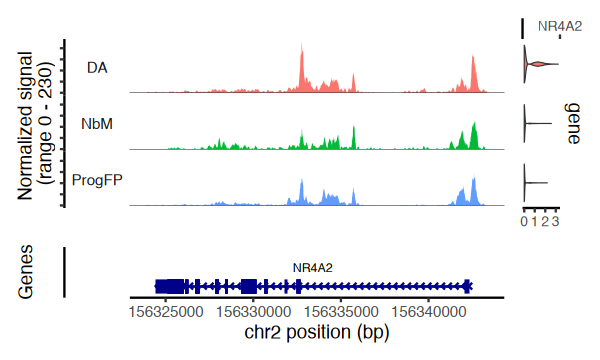

In [170]:
gene_marker = "NR4A2"
options(repr.plot.width=5, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

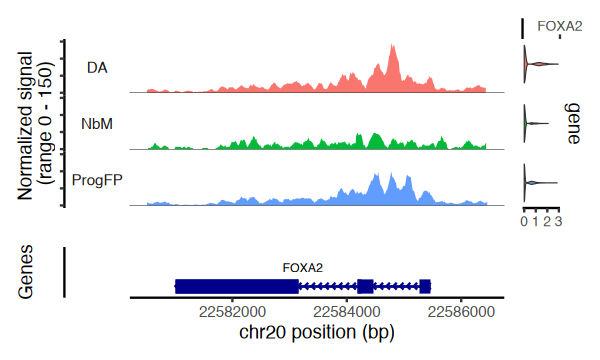

In [173]:
gene_marker = "FOXA2"
options(repr.plot.width=5, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

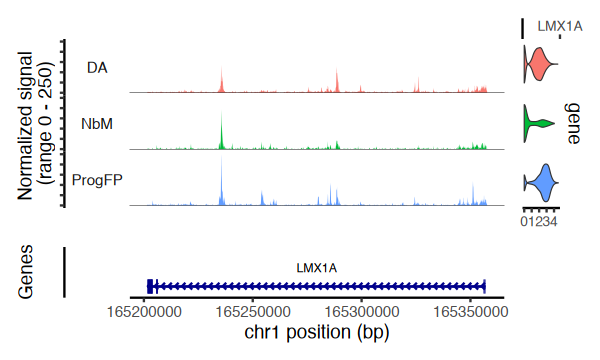

In [180]:
gene_marker = "LMX1A"
options(repr.plot.width=5, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

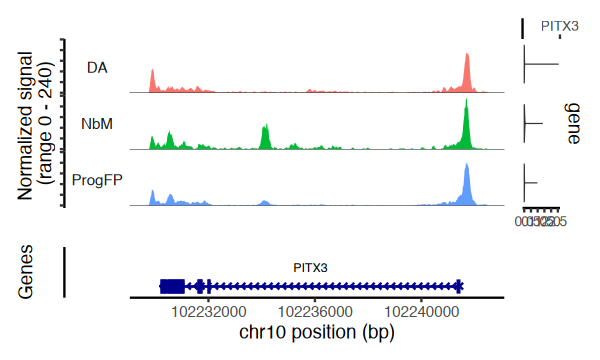

In [192]:
gene_marker = "PITX3"
options(repr.plot.width=5, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

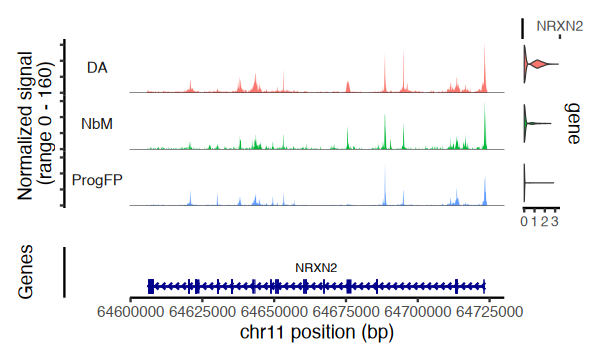

In [194]:
gene_marker = "NRXN2"
options(repr.plot.width=5, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

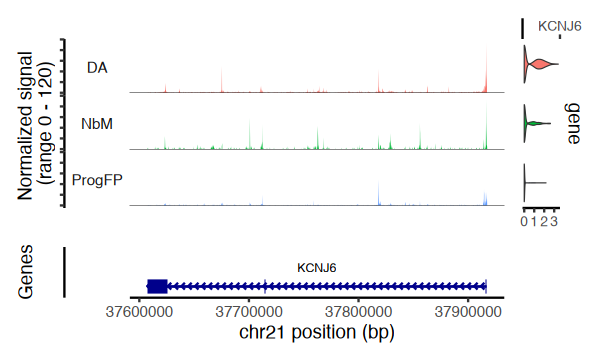

In [198]:
gene_marker = "KCNJ6"
options(repr.plot.width=5, repr.plot.height=3)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

In [176]:
saveRDS(XMAS, '~/Desktop/XMAS_analysis/outputs/s06_MS_XMAS_relabeled.rds')

# 2. HVRs analysis

## 2.1 BIMOD_OC_DES

In [35]:
XMAS.peaks.markers  <- readRDS("~/Desktop/XMAS_analysis/outputs/XMAS.peaks.markers_bimod_oc_des.rds")

In [36]:
head(XMAS.peaks.markers)

p_val        avg_log2FC pct.1 pct.2 p_val_adj 
chr19-35247573-35249609   3.501635e-07 1.2504300  0.355 0.169 0.06693516
chr6-100209812-100210998  2.346439e-06 0.7964995  0.106 0.066 0.44853125
chr11-129695196-129696377 3.272584e-06 1.0986143  0.100 0.049 0.62556759
chr16-72111413-72113053   3.398435e-06 1.8079887  0.139 0.045 0.64962439
chr15-81015384-81016248   1.000623e-05 1.7275772  0.127 0.041 1.00000000
chr1-25253475-25254358    1.245282e-05 1.9334546  0.222 0.066 1.00000000
                          cluster gene                     
chr19-35247573-35249609   Rgl1    chr19-35247573-35249609  
chr6-100209812-100210998  Rgl1    chr6-100209812-100210998 
chr11-129695196-129696377 Rgl1    chr11-129695196-129696377
chr16-72111413-72113053   Rgl1    chr16-72111413-72113053  
chr15-81015384-81016248   Rgl1    chr15-81015384-81016248  
chr1-25253475-25254358    Rgl1    chr1-25253475-25254358

In [37]:
XMAS.peaks.markers_best <- XMAS.peaks.markers[XMAS.peaks.markers$p_val_adj < 0.05,]

In [220]:
topDiffCluster <- XMAS.peaks.markers_best %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

In [205]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster 
1 4.186364e-10 0.5215984  0.194 0.131 8.002403e-05 ProgFP.S
2 1.303736e-09 2.6353341  0.140 0.022 2.492144e-04 ProgFP.S
3 1.420630e-09 1.4822281  0.199 0.067 2.715590e-04 ProgFP.S
4 1.676355e-08 1.9430475  0.177 0.044 3.204419e-03 ProgFP.S
5 2.635260e-08 1.0856578  0.123 0.055 5.037405e-03 ProgFP.S
6 3.298864e-08 2.6018779  0.139 0.023 6.305910e-03 ProgFP.S
  gene                    
1 chr1-6961885-6963898    
2 chr11-92472542-92473391 
3 chr9-2809188-2810975    
4 chr13-59487506-59488809 
5 chr1-97796093-97797680  
6 chr5-119287579-119288989

In [208]:
closest_genes_XMAS <- ClosestFeature(XMAS, regions = topDiffCluster$gene)

In [221]:
topDiffCluster$gene <- paste0(closest_genes_XMAS$gene_name)

In [222]:
topDiffCluster$gene_2 <- paste0(closest_genes_XMAS$gene_name,"_",closest_genes_XMAS$distance)

In [223]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster  gene   
1 4.186364e-10 0.5215984  0.194 0.131 8.002403e-05 ProgFP.S CAMTA1 
2 1.303736e-09 2.6353341  0.140 0.022 2.492144e-04 ProgFP.S FAT3   
3 1.420630e-09 1.4822281  0.199 0.067 2.715590e-04 ProgFP.S PUM3   
4 1.676355e-08 1.9430475  0.177 0.044 3.204419e-03 ProgFP.S DIAPH3 
5 2.635260e-08 1.0856578  0.123 0.055 5.037405e-03 ProgFP.S DPYD   
6 3.298864e-08 2.6018779  0.139 0.023 6.305910e-03 ProgFP.S TNFAIP8
  gene_2       
1 CAMTA1_0     
2 FAT3_0       
3 PUM3_0       
4 DIAPH3_176773
5 DPYD_0       
6 TNFAIP8_0

In [212]:
heatmap_genes_rownames <- topDiffCluster$gene_2

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
Warning message:
"CombinePlots is being deprecated. Plots should now be combined using the patchwork system."


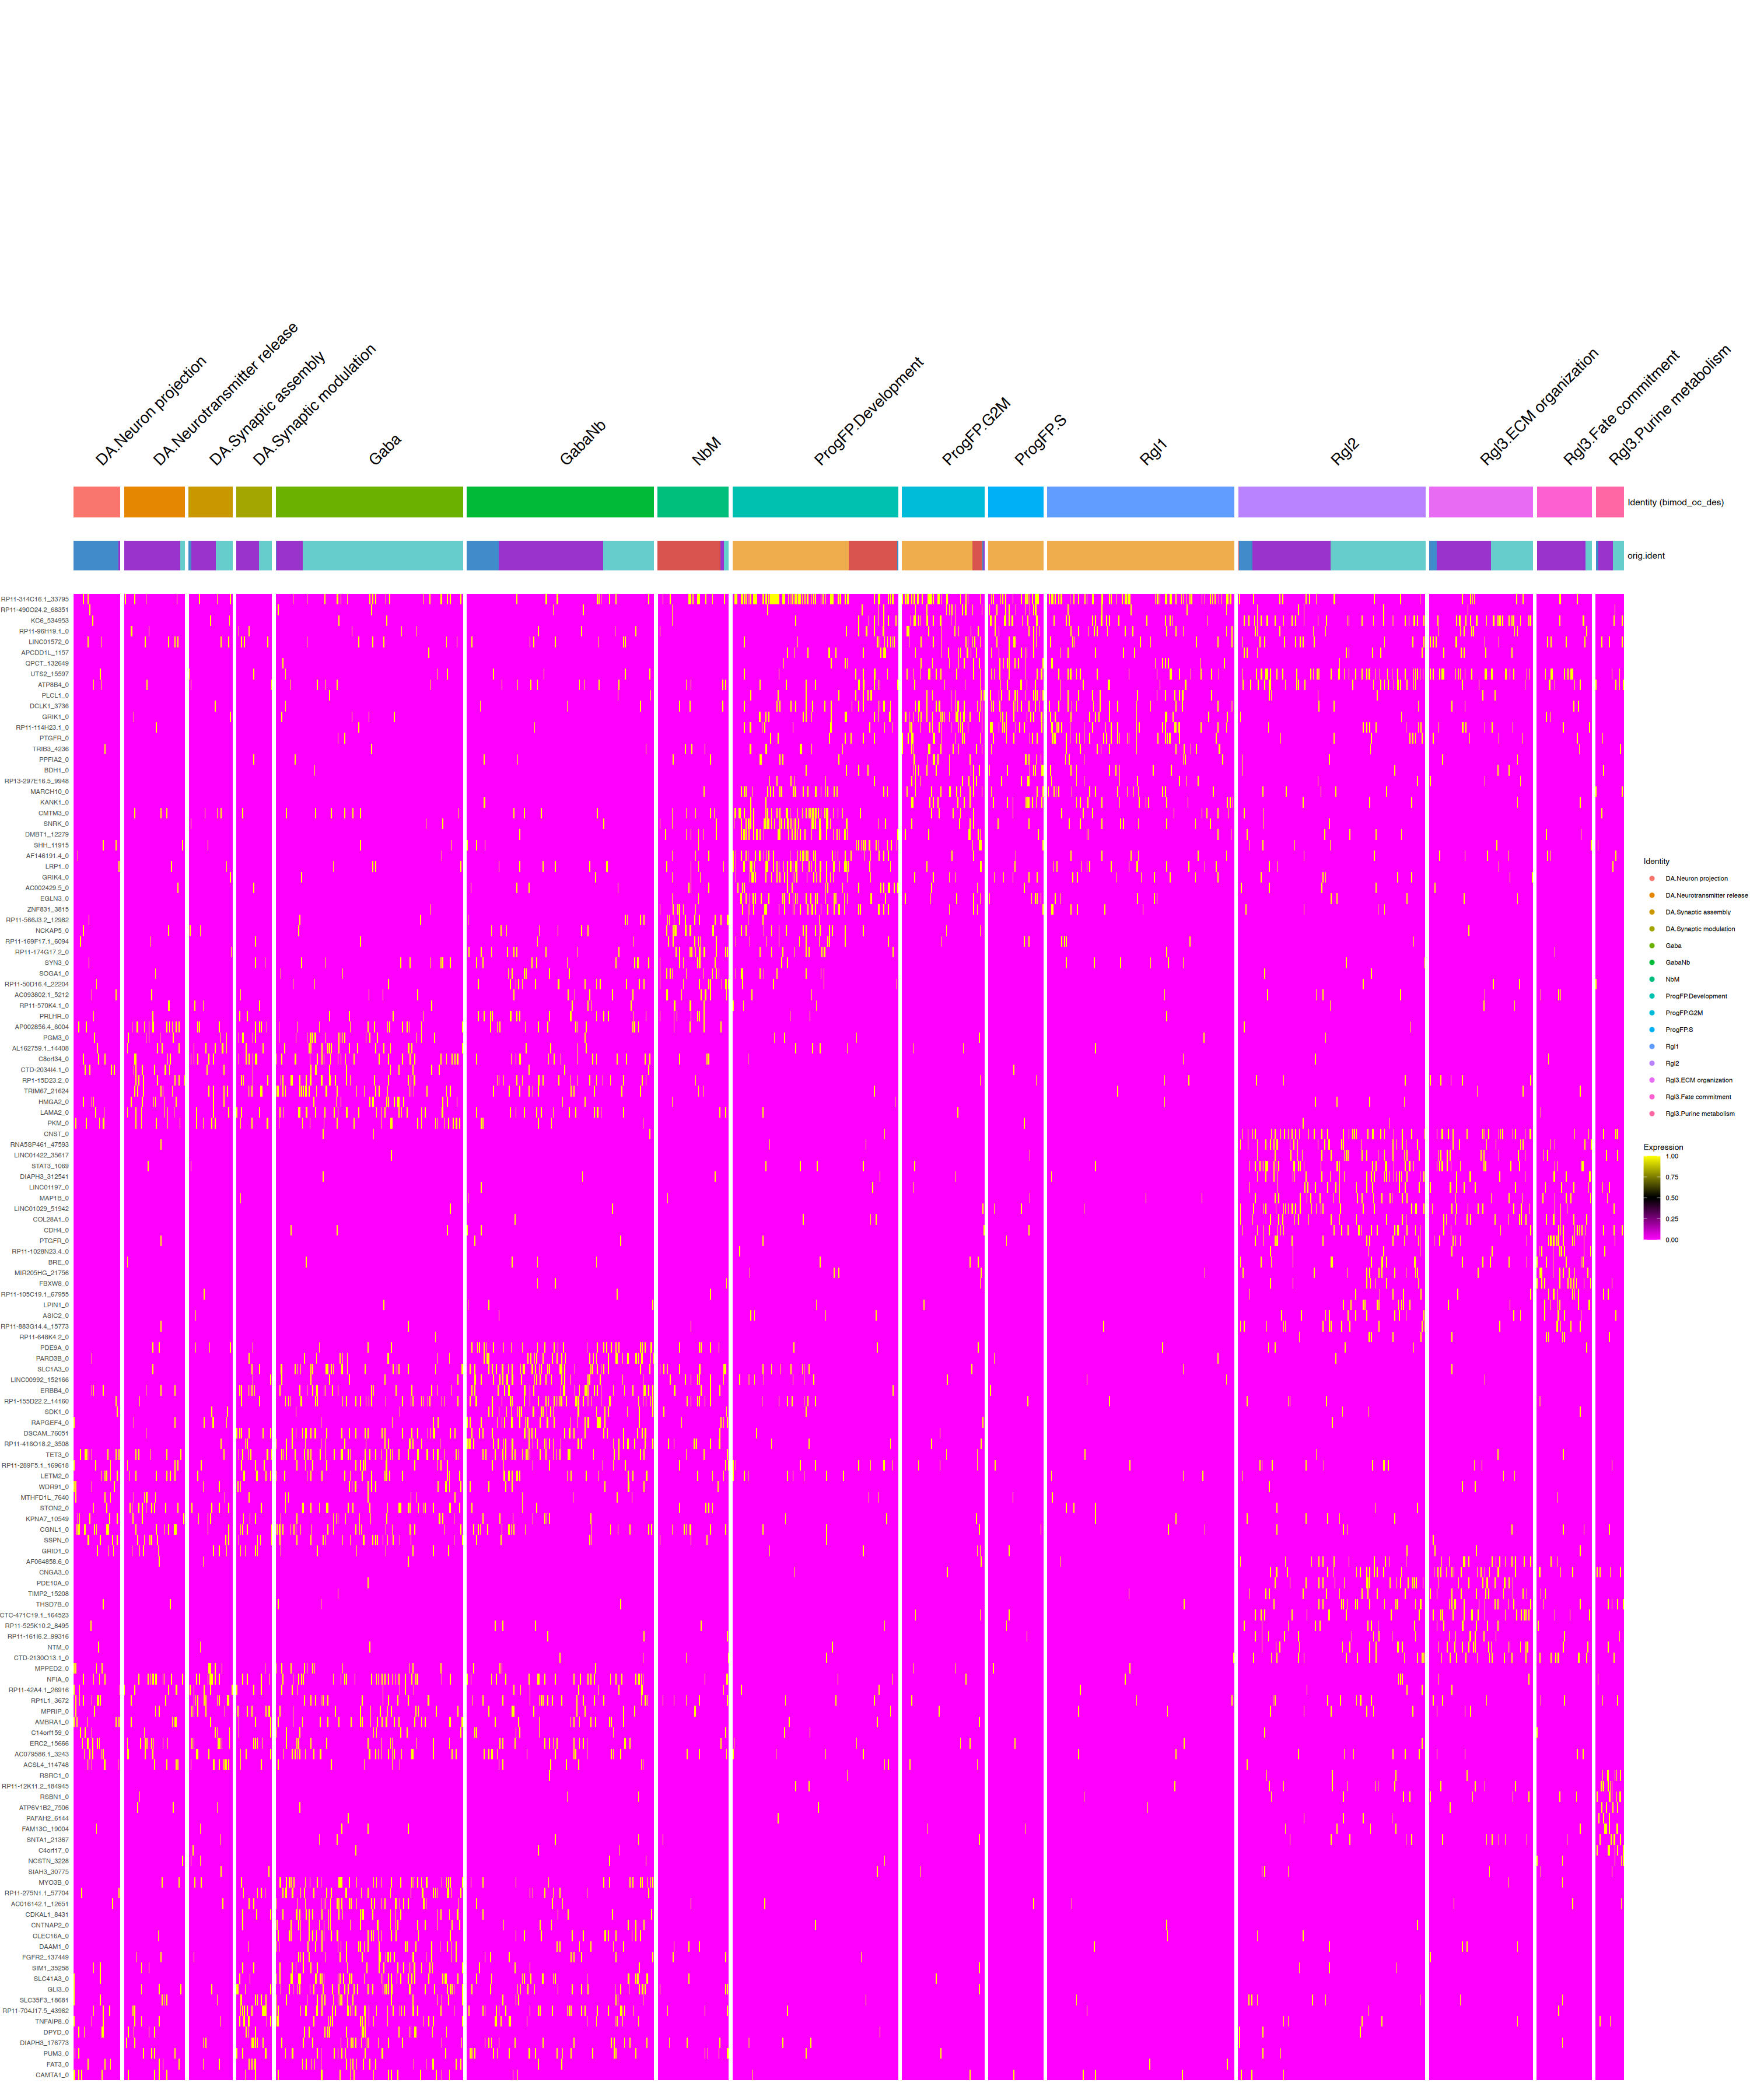

In [218]:
options(repr.plot.width=25, repr.plot.height=30)
DoMultiBarHeatmap(
    subset(XMAS, downsample = 200),
    features = topDiffCluster$gene,
    cells = NULL,
    group.by = "bimod_oc_des",
    additional.group.by = c("orig.ident"),
    additional.group.sort.by = c("orig.ident"),
    cols.use = list(orig.ident=orig.ident_colors),
    group.bar = TRUE,
    disp.min = 0,
    disp.max = 1,
    slot = "counts",
    assay = "peaks",
    label = TRUE,
    size = 5.5,
    hjust = 0,
    angle = 45,
    raster = TRUE,
    draw.lines = TRUE,
    lines.width = NULL,
    group.bar.height = 0.02,
    combine = TRUE
    ) + theme(text = element_text(size = 8)) + scale_y_discrete(labels = heatmap_genes_rownames)

In [224]:
write.csv(topDiffCluster,paste0("~/Desktop/XMAS_analysis/outputs/XMAS_peaks_Top10_bimod_oc_des.csv"),row.names = FALSE)

In [ ]:
### RP/AS/./LINC genes filtering

In [38]:
topDiffCluster <- XMAS.peaks.markers_best %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)

In [39]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster 
1 4.186364e-10 0.5215984  0.194 0.131 8.002403e-05 ProgFP.S
2 1.303736e-09 2.6353341  0.140 0.022 2.492144e-04 ProgFP.S
3 1.420630e-09 1.4822281  0.199 0.067 2.715590e-04 ProgFP.S
4 1.676355e-08 1.9430475  0.177 0.044 3.204419e-03 ProgFP.S
5 2.635260e-08 1.0856578  0.123 0.055 5.037405e-03 ProgFP.S
6 3.298864e-08 2.6018779  0.139 0.023 6.305910e-03 ProgFP.S
  gene                    
1 chr1-6961885-6963898    
2 chr11-92472542-92473391 
3 chr9-2809188-2810975    
4 chr13-59487506-59488809 
5 chr1-97796093-97797680  
6 chr5-119287579-119288989

In [42]:
closest_genes_XMAS <- ClosestFeature(XMAS, regions = topDiffCluster$gene)

In [43]:
topDiffCluster$gene <- paste0(closest_genes_XMAS$gene_name)

In [44]:
topDiffCluster$gene_2 <- paste0(closest_genes_XMAS$gene_name,"_",closest_genes_XMAS$distance)

In [45]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster  gene   
1 4.186364e-10 0.5215984  0.194 0.131 8.002403e-05 ProgFP.S CAMTA1 
2 1.303736e-09 2.6353341  0.140 0.022 2.492144e-04 ProgFP.S FAT3   
3 1.420630e-09 1.4822281  0.199 0.067 2.715590e-04 ProgFP.S PUM3   
4 1.676355e-08 1.9430475  0.177 0.044 3.204419e-03 ProgFP.S DIAPH3 
5 2.635260e-08 1.0856578  0.123 0.055 5.037405e-03 ProgFP.S DPYD   
6 3.298864e-08 2.6018779  0.139 0.023 6.305910e-03 ProgFP.S TNFAIP8
  gene_2       
1 CAMTA1_0     
2 FAT3_0       
3 PUM3_0       
4 DIAPH3_176773
5 DPYD_0       
6 TNFAIP8_0

In [46]:
topDiffCluster <- topDiffCluster %>% filter(!grepl("^RP[SL]", gene)) %>% 
          filter(!grepl("\\.", gene)) %>% filter(!grepl("-", gene)) %>% filter(!grepl("^LINC", gene)) %>%
 group_by(cluster) %>% top_n(n = 50, wt = avg_log2FC)

In [48]:
write.csv(topDiffCluster,paste0("~/Desktop/XMAS_analysis/outputs/XMAS_peaks_Top50_bimod_oc_des_filtered.csv"),row.names = FALSE)

## 2.2 BIMOD_OC

In [238]:
XMAS.peaks.markers  <- readRDS("~/Desktop/XMAS_analysis/outputs/XMAS.peaks.markers_bimod_oc.rds")

In [239]:
head(XMAS.peaks.markers)

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
chr11-112616188-112617482 5.749743e-82 2.877476   0.166 0.025 1.099086e-76
chr2-2330958-2332690      5.299548e-78 2.658535   0.225 0.038 1.013030e-72
chr2-207309863-207311659  5.436822e-73 2.511338   0.208 0.039 1.039270e-67
chr10-2209508-2210920     5.943572e-73 3.513327   0.144 0.013 1.136138e-67
chr19-42352070-42353224   1.121192e-72 1.142764   0.244 0.130 2.143203e-67
chr15-73317814-73319612   1.004902e-66 1.879253   0.239 0.074 1.920911e-61
                          cluster gene                     
chr11-112616188-112617482 DA      chr11-112616188-112617482
chr2-2330958-2332690      DA      chr2-2330958-2332690     
chr2-207309863-207311659  DA      chr2-207309863-207311659 
chr10-2209508-2210920     DA      chr10-2209508-2210920    
chr19-42352070-42353224   DA      chr19-42352070-42353224  
chr15-73317814-73319612   DA      chr15-73317814-73319612

In [240]:
XMAS.peaks.markers_best <- XMAS.peaks.markers[XMAS.peaks.markers$p_val_adj < 0.05,]

In [241]:
topDiffCluster <- XMAS.peaks.markers_best %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

In [242]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster
1 5.943572e-73 3.513327   0.144 0.013 1.136138e-67 DA     
2 2.740093e-66 3.487529   0.120 0.012 5.237798e-61 DA     
3 1.715174e-63 3.074177   0.133 0.018 3.278625e-58 DA     
4 3.631786e-62 3.739963   0.101 0.008 6.942305e-57 DA     
5 2.728167e-58 3.119721   0.124 0.015 5.215000e-53 DA     
6 1.058254e-57 3.694774   0.101 0.008 2.022894e-52 DA     
  gene                     
1 chr10-2209508-2210920    
2 chr5-133760594-133762105 
3 chr12-132248560-132250005
4 chr17-14224858-14226144  
5 chr1-110593332-110594543 
6 chr11-132168121-132169007

In [243]:
closest_genes_XMAS <- ClosestFeature(XMAS, regions = topDiffCluster$gene)

In [244]:
topDiffCluster$gene <- paste0(closest_genes_XMAS$gene_name)

In [245]:
topDiffCluster$gene_2 <- paste0(closest_genes_XMAS$gene_name,"_",closest_genes_XMAS$distance)

In [246]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene        
1 5.943572e-73 3.513327   0.144 0.013 1.136138e-67 DA      RP11-69C17.4
2 2.740093e-66 3.487529   0.120 0.012 5.237798e-61 DA      FSTL4       
3 1.715174e-63 3.074177   0.133 0.018 3.278625e-58 DA      GALNT9      
4 3.631786e-62 3.739963   0.101 0.008 6.942305e-57 DA      AC005224.2  
5 2.728167e-58 3.119721   0.124 0.015 5.215000e-53 DA      KCNA2       
6 1.058254e-57 3.694774   0.101 0.008 2.022894e-52 DA      NTM         
  gene_2            
1 RP11-69C17.4_20033
2 FSTL4_148029      
3 GALNT9_0          
4 AC005224.2_6935   
5 KCNA2_0           
6 NTM_0

In [247]:
heatmap_genes_rownames <- topDiffCluster$gene_2

In [ ]:
options(repr.plot.width=25, repr.plot.height=30)
DoMultiBarHeatmap(
    subset(XMAS, downsample = 200),
    features = topDiffCluster$gene,
    cells = NULL,
    group.by = "bimod_oc",
    additional.group.by = c("orig.ident"),
    additional.group.sort.by = c("orig.ident"),
    cols.use = list(orig.ident=orig.ident_colors),
    group.bar = TRUE,
    disp.min = 0,
    disp.max = 1,
    slot = "counts",
    assay = "peaks",
    label = TRUE,
    size = 5.5,
    hjust = 0,
    angle = 45,
    raster = TRUE,
    draw.lines = TRUE,
    lines.width = NULL,
    group.bar.height = 0.02,
    combine = TRUE
    ) + theme(text = element_text(size = 8)) + scale_y_discrete(labels = heatmap_genes_rownames)

In [250]:
write.csv(topDiffCluster,paste0("~/Desktop/XMAS_analysis/outputs/XMAS_peaks_Top10_bimod_oc.csv"),row.names = FALSE)

In [ ]:
### RP/AS/./LINC genes filtering

In [251]:
topDiffCluster <- XMAS.peaks.markers_best %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)

In [252]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster
1 5.749743e-82 2.877476   0.166 0.025 1.099086e-76 DA     
2 5.299548e-78 2.658535   0.225 0.038 1.013030e-72 DA     
3 5.436822e-73 2.511338   0.208 0.039 1.039270e-67 DA     
4 5.943572e-73 3.513327   0.144 0.013 1.136138e-67 DA     
5 2.398548e-66 2.658489   0.154 0.027 4.584920e-61 DA     
6 2.740093e-66 3.487529   0.120 0.012 5.237798e-61 DA     
  gene                     
1 chr11-112616188-112617482
2 chr2-2330958-2332690     
3 chr2-207309863-207311659 
4 chr10-2209508-2210920    
5 chr16-57945907-57947228  
6 chr5-133760594-133762105

In [253]:
closest_genes_XMAS <- ClosestFeature(XMAS, regions = topDiffCluster$gene)

In [254]:
topDiffCluster$gene <- paste0(closest_genes_XMAS$gene_name)

In [255]:
topDiffCluster$gene_2 <- paste0(closest_genes_XMAS$gene_name,"_",closest_genes_XMAS$distance)

In [256]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene        
1 5.749743e-82 2.877476   0.166 0.025 1.099086e-76 DA      RP11-65M17.3
2 5.299548e-78 2.658535   0.225 0.038 1.013030e-72 DA      MYT1L       
3 5.436822e-73 2.511338   0.208 0.039 1.039270e-67 DA      AC007879.6  
4 5.943572e-73 3.513327   0.144 0.013 1.136138e-67 DA      RP11-69C17.4
5 2.398548e-66 2.658489   0.154 0.027 4.584920e-61 DA      CNGB1       
6 2.740093e-66 3.487529   0.120 0.012 5.237798e-61 DA      FSTL4       
  gene_2            
1 RP11-65M17.3_0    
2 MYT1L_0           
3 AC007879.6_39172  
4 RP11-69C17.4_20033
5 CNGB1_0           
6 FSTL4_148029

In [257]:
topDiffCluster <- topDiffCluster %>% filter(!grepl("^RP[SL]", gene)) %>% 
          filter(!grepl("\\.", gene)) %>% filter(!grepl("-", gene)) %>% filter(!grepl("^LINC", gene)) %>%
 group_by(cluster) %>% top_n(n = 10)

Selecting by gene_2


In [258]:
write.csv(topDiffCluster,paste0("~/Desktop/XMAS_analysis/outputs/XMAS_peaks_Top10_bimod_oc_filtered.csv"),row.names = FALSE)

## 2.3 Subsetted DA neurons

In [5]:
sec.da <- XMAS[,XMAS$bimod_oc =='DA']
sec.da <- sec.da[,!sec.da$orig.ident %in% c("D11","D16")]

Loading required package: Signac



In [6]:
table(sec.da$orig.ident,sec.da$bimod_oc_des)

     
      DA.Neuron projection DA.Neurotransmitter release DA.Synaptic assembly
  D28                  730                           8                   49
  D42                   28                         992                  432
  D56                    2                          86                  403
     
      DA.Synaptic modulation
  D28                      0
  D42                    353
  D56                    285

In [9]:
DefaultAssay(sec.da) <- 'peaks'
Idents(object = sec.da) <- "orig.ident"

In [12]:
sec.da.peaks.markers <- FindAllMarkers(sec.da, slot = "data", min.pct = 0.1, logfc.threshold = 0.5, test.use = 'LR', only.pos = TRUE, latent.vars = c('bFRiP', 'TSS.enrichment'), verbose=TRUE)

Calculating cluster D28

Warning message:
“The following requested variables were not found: bFRiP”
Calculating cluster D42

Warning message:
“The following requested variables were not found: bFRiP”
Calculating cluster D56

Warning message:
“The following requested variables were not found: bFRiP”


In [13]:
sec.da.peaks.markers_best <- sec.da.peaks.markers[sec.da.peaks.markers$p_val_adj < 0.05,]

In [27]:
topDiffCluster <- sec.da.peaks.markers_best %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)

In [28]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster
1 5.166238e-18 2.0490467  0.122 0.029 9.875471e-13 D28    
2 4.761260e-14 0.8462250  0.295 0.164 9.101338e-09 D28    
3 9.378650e-14 1.0813540  0.243 0.112 1.792766e-08 D28    
4 9.910166e-14 1.0314583  0.221 0.107 1.894368e-08 D28    
5 1.995328e-13 0.9250484  0.271 0.143 3.814148e-08 D28    
6 3.097102e-12 1.0022998  0.219 0.107 5.920235e-07 D28    
  gene                    
1 chr20-59359768-59360638 
2 chr15-99104643-99106282 
3 chr13-71864132-71867618 
4 chr8-64579770-64581859  
5 chr4-98657440-98659263  
6 chr7-146115447-146117140

In [29]:
closest_genes_sec.da <- ClosestFeature(sec.da, regions = topDiffCluster$gene)

In [30]:
topDiffCluster$gene <- paste0(closest_genes_sec.da$gene_name)

In [31]:
topDiffCluster$gene_2 <- paste0(closest_genes_sec.da$gene_name,"_",closest_genes_sec.da$distance)

In [32]:
head(topDiffCluster)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene        
1 5.166238e-18 2.0490467  0.122 0.029 9.875471e-13 D28     RP4-614C15.3
2 4.761260e-14 0.8462250  0.295 0.164 9.101338e-09 D28     SYNM        
3 9.378650e-14 1.0813540  0.243 0.112 1.792766e-08 D28     DACH1       
4 9.910166e-14 1.0314583  0.221 0.107 1.894368e-08 D28     BHLHE22     
5 1.995328e-13 0.9250484  0.271 0.143 3.814148e-08 D28     TSPAN5      
6 3.097102e-12 1.0022998  0.219 0.107 5.920235e-07 D28     CNTNAP2     
  gene_2          
1 RP4-614C15.3_288
2 SYNM_0          
3 DACH1_0         
4 BHLHE22_0       
5 TSPAN5_0        
6 CNTNAP2_0

In [33]:
topDiffCluster <- topDiffCluster %>% filter(!grepl("^RP[SL]", gene)) %>% 
          filter(!grepl("\\.", gene)) %>% filter(!grepl("-", gene)) %>% filter(!grepl("^LINC", gene)) %>%
 group_by(cluster) %>% top_n(n = 10,  wt = avg_log2FC)

In [34]:
write.csv(topDiffCluster,paste0("~/Desktop/XMAS_analysis/outputs/XMAS_peaks_Top10_da_orig.ident.csv"),row.names = FALSE)

# 3. Visualization

## 3.1 BIMOD_OC_DES

In [75]:
Idents(sec) <- 'bimod_oc_des'

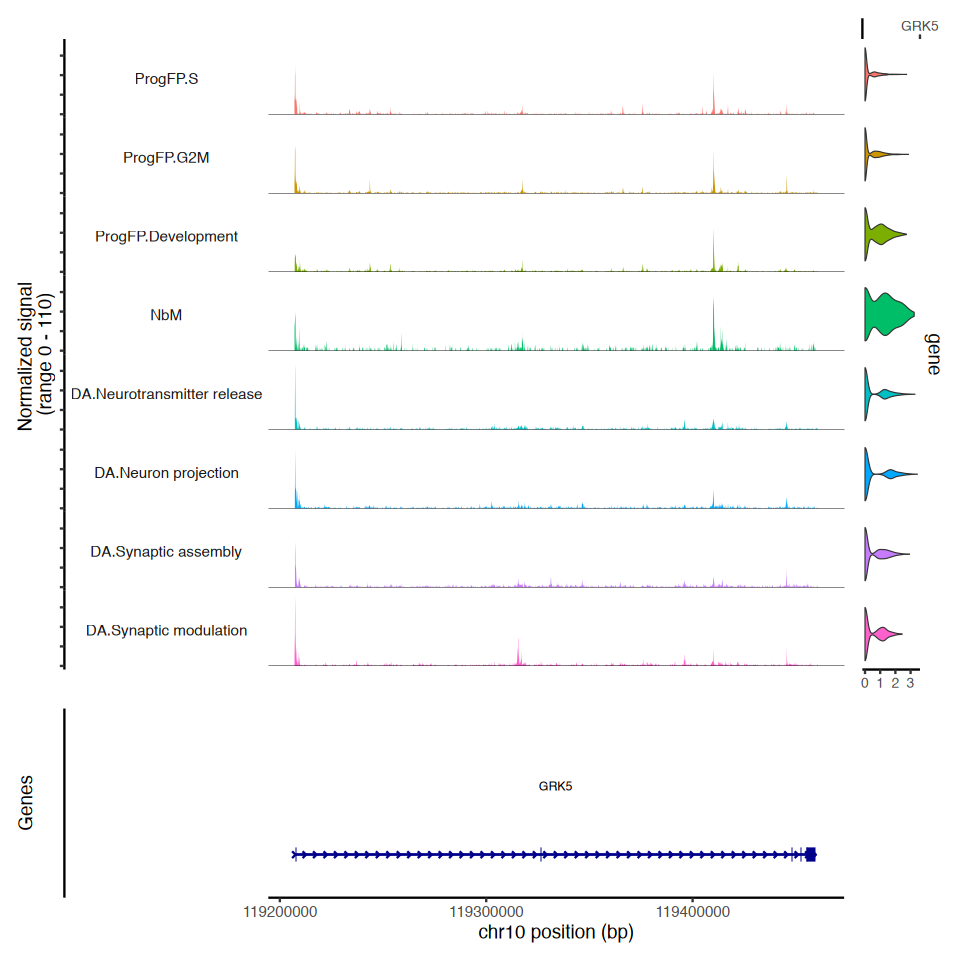

In [284]:
gene_marker = "GRK5"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
"Removed 29 rows containing missing values or values outside the scale range
(`geom_segment()`)."


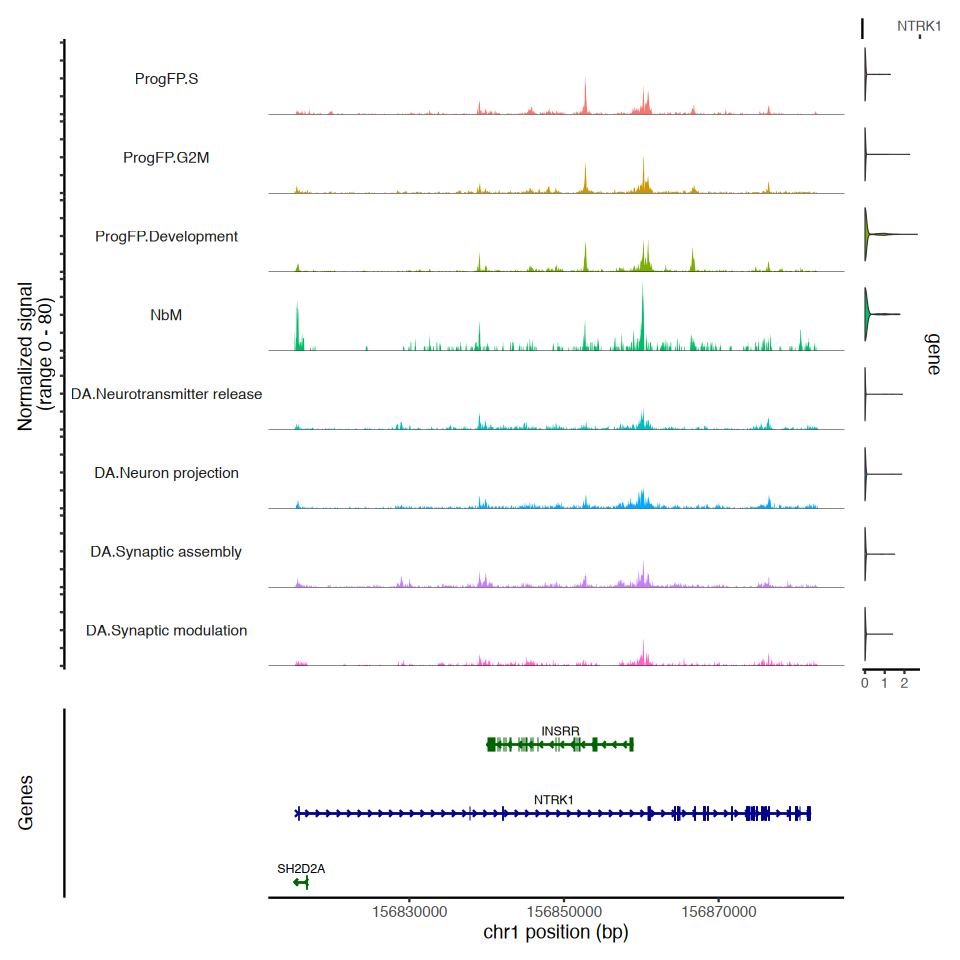

In [287]:
gene_marker = "NTRK1"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

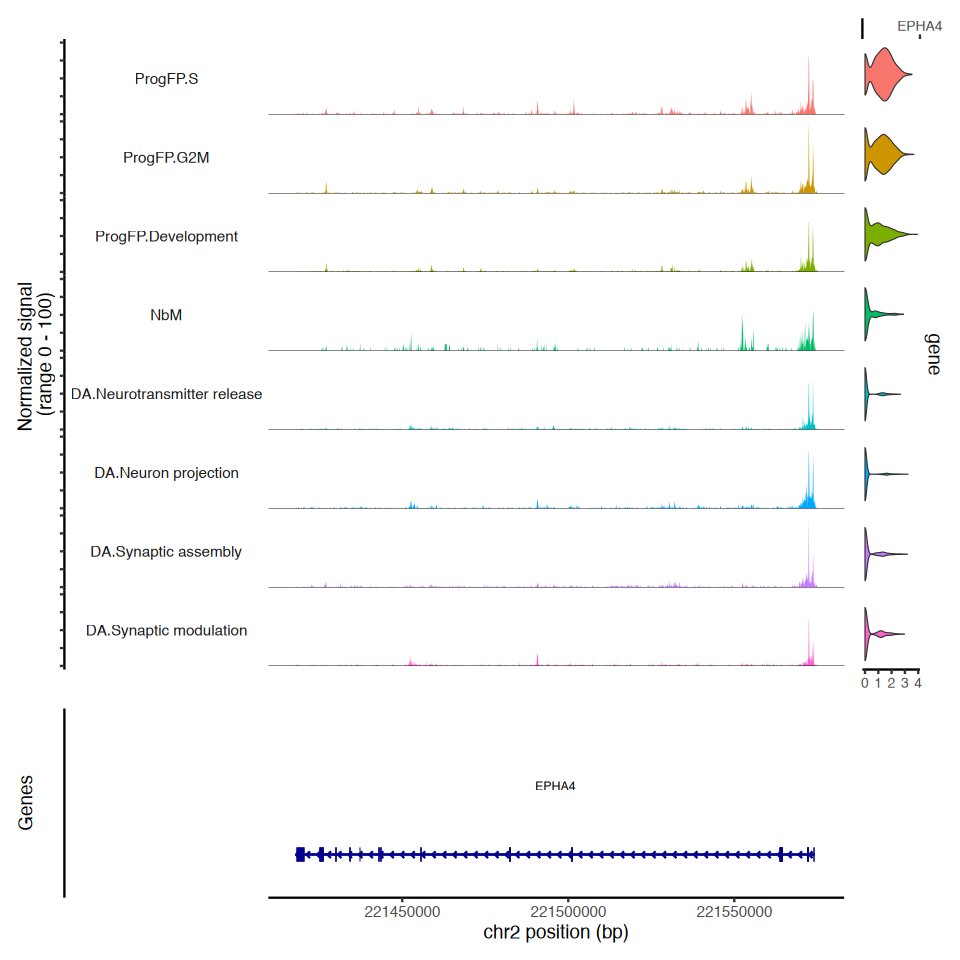

In [288]:
gene_marker = "EPHA4"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

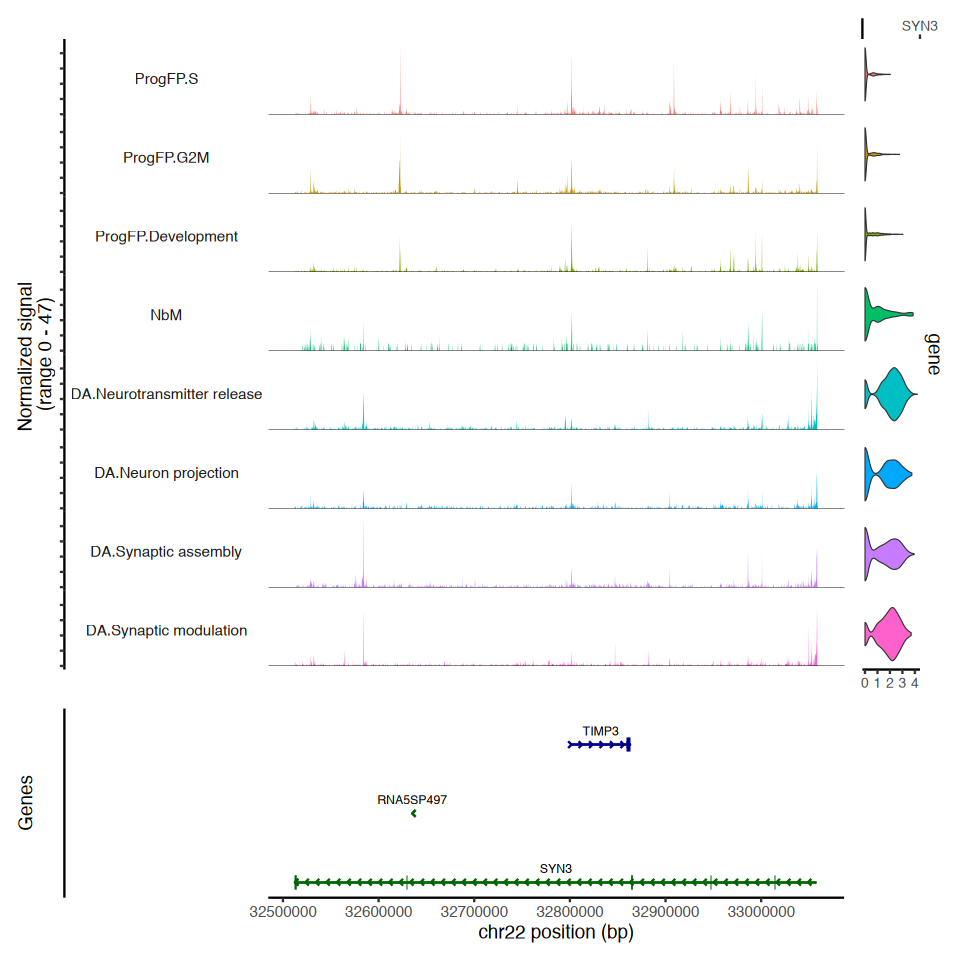

In [285]:
gene_marker = "SYN3"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
"Removed 9 rows containing missing values or values outside the scale range
(`geom_segment()`)."


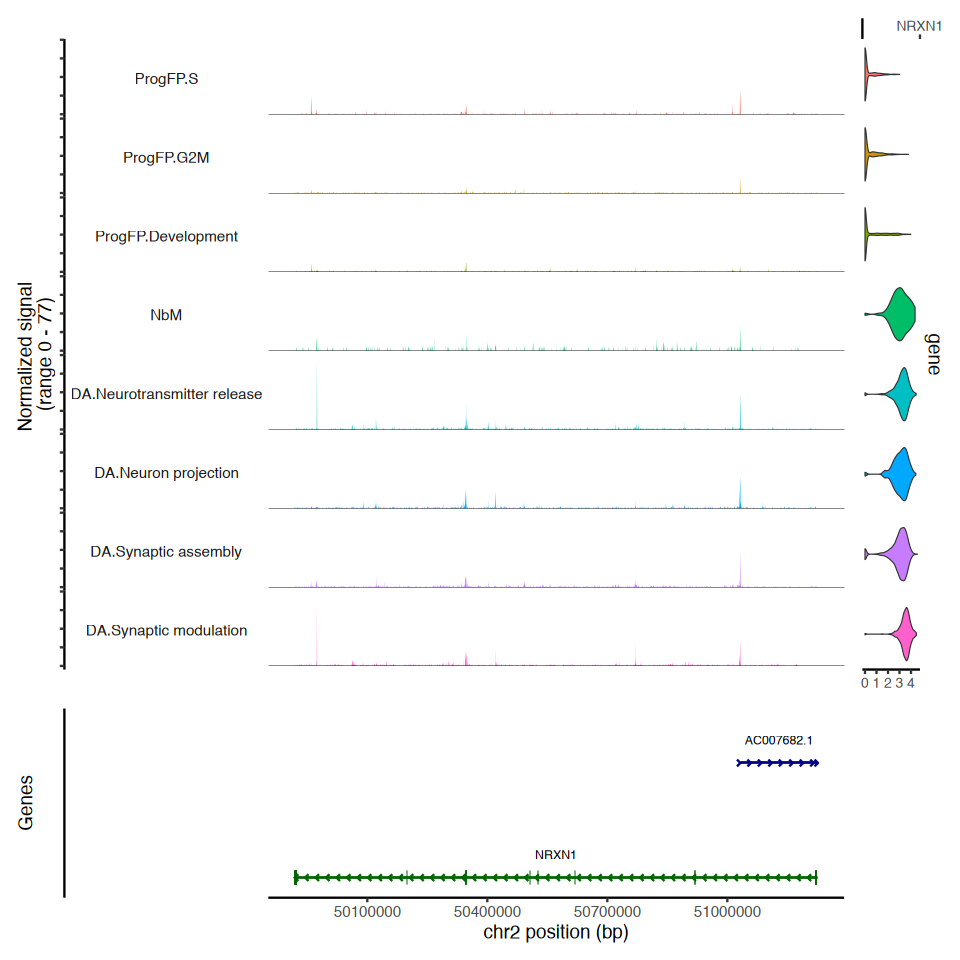

In [286]:
gene_marker = "NRXN1"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

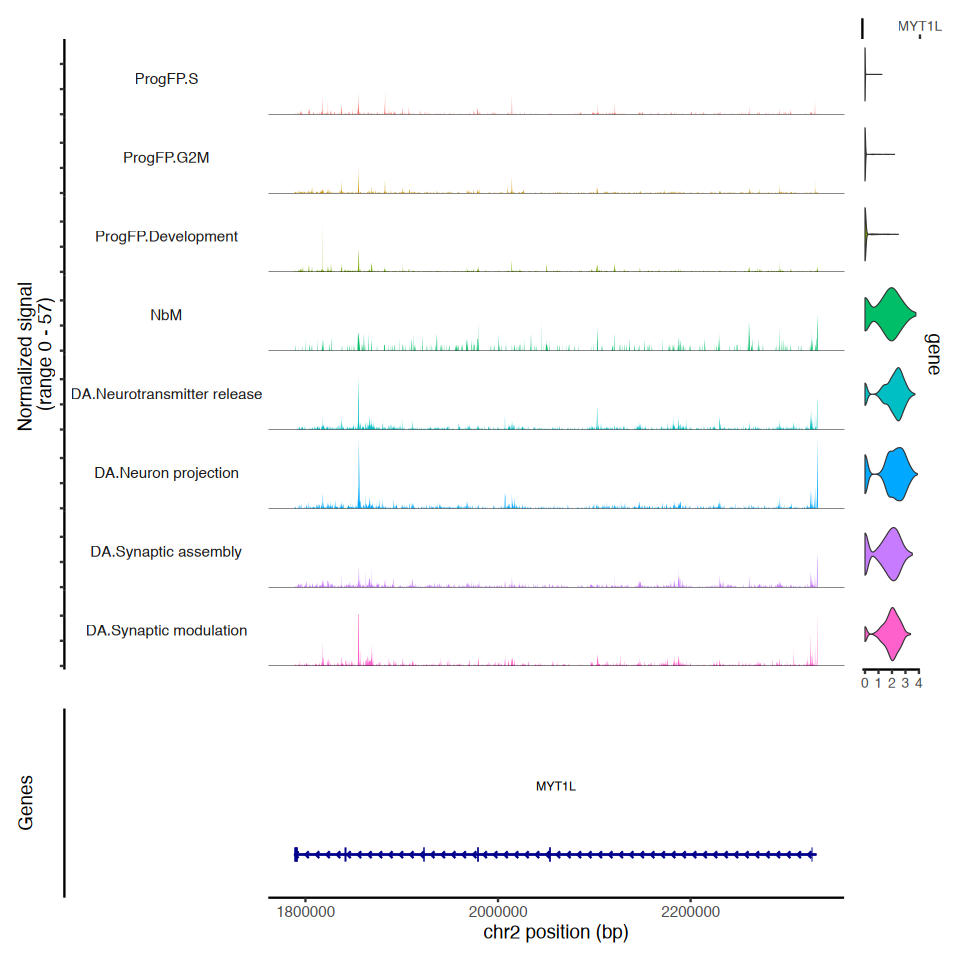

In [283]:
gene_marker = "MYT1L"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

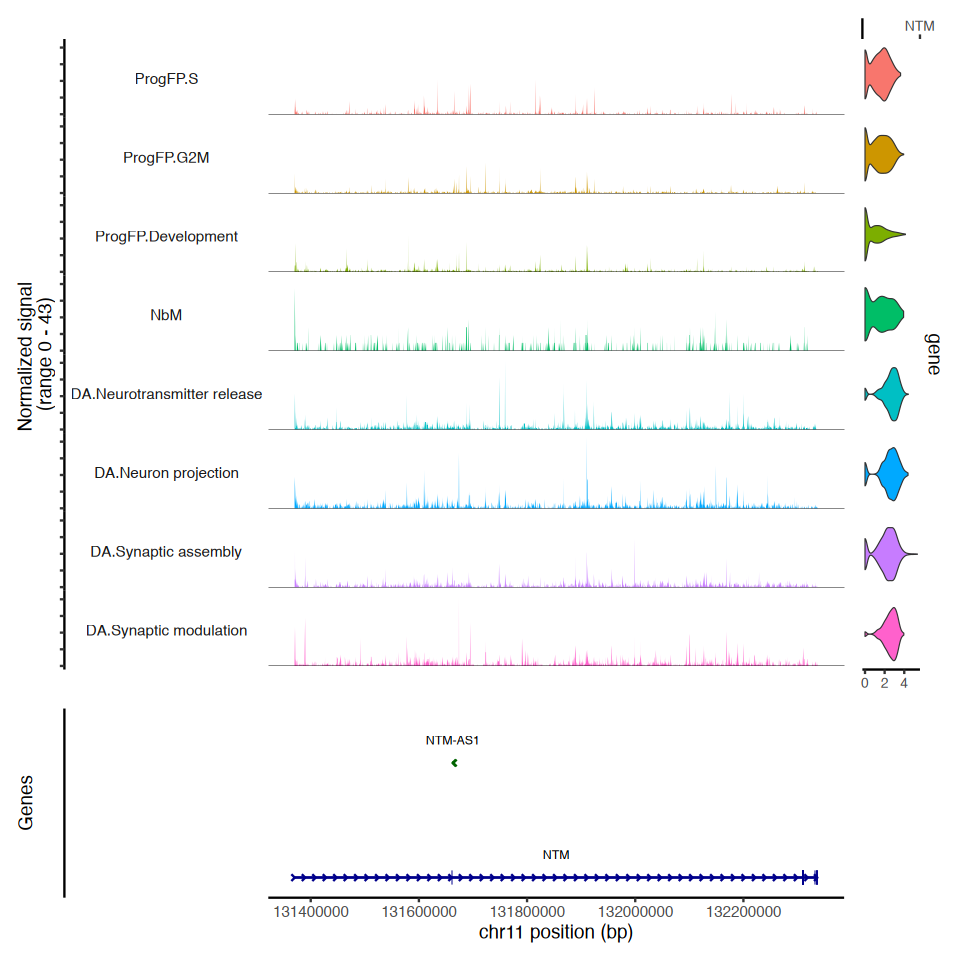

In [280]:
gene_marker = "NTM"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

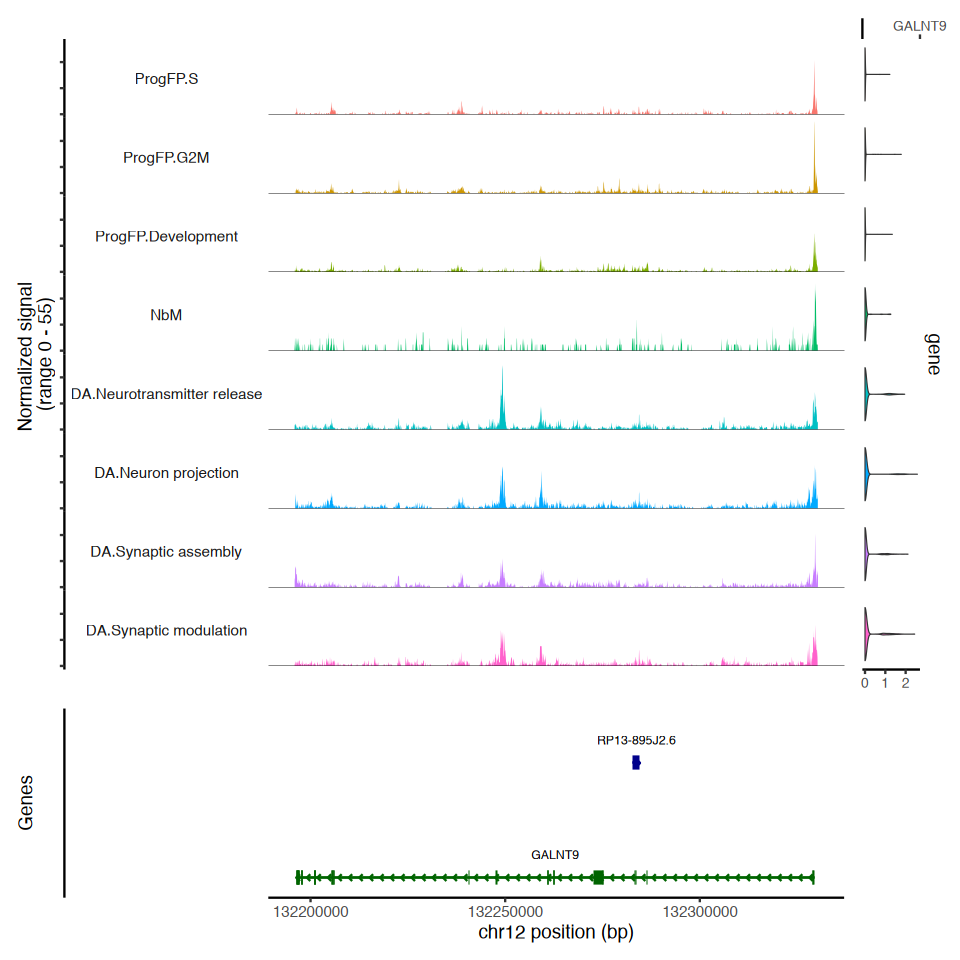

In [281]:
gene_marker = "GALNT9"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

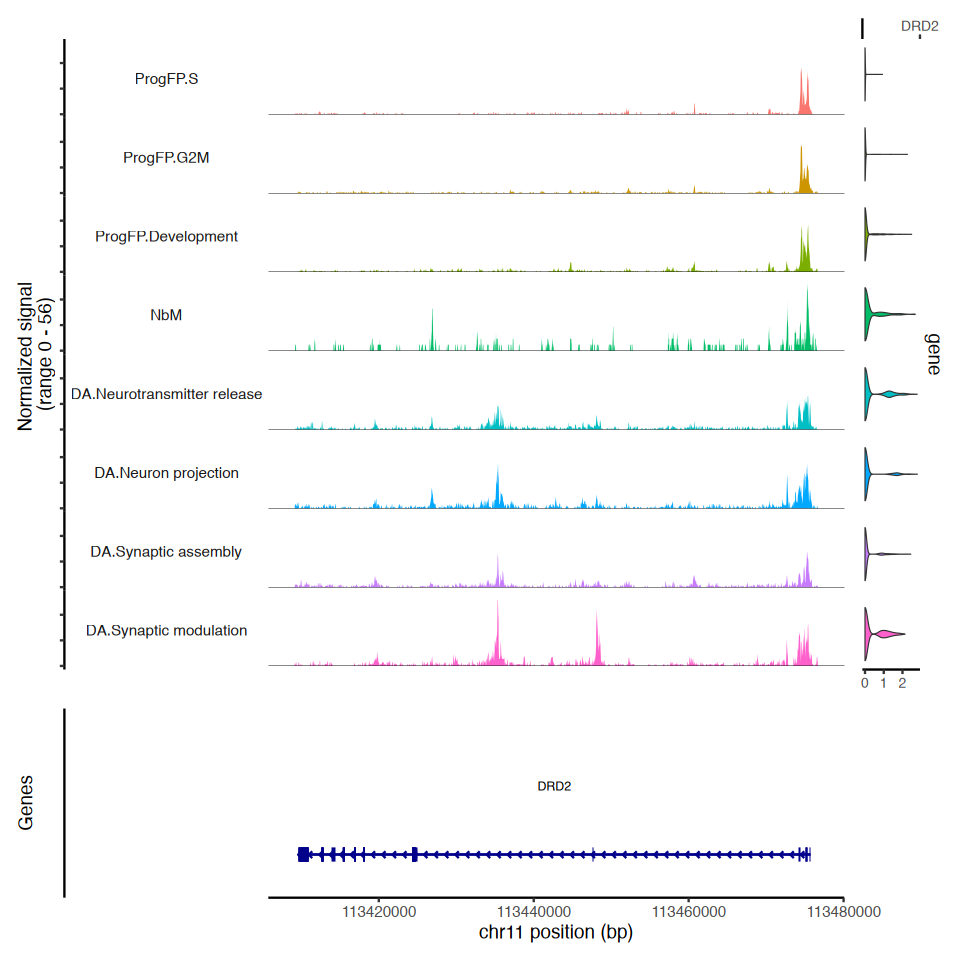

In [282]:
gene_marker = "DRD2"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
“Removed 31 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


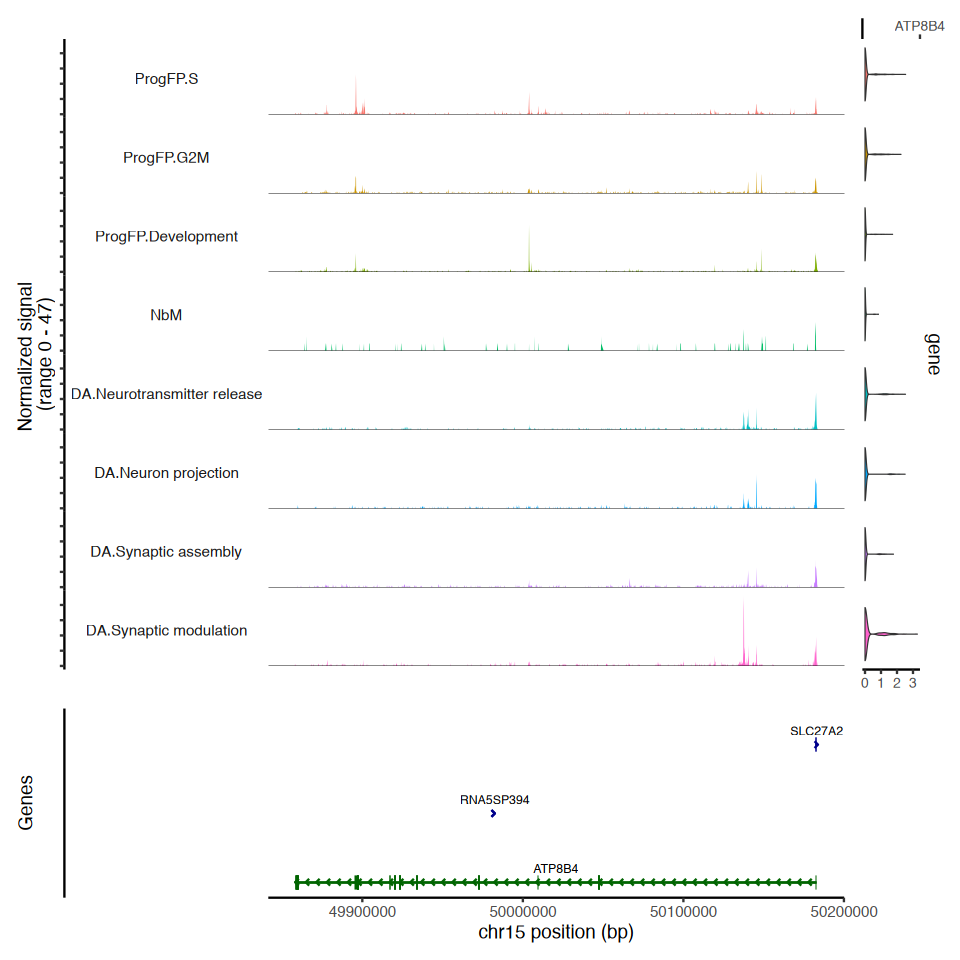

In [57]:
gene_marker = "ATP8B4"
options(repr.plot.width=8, repr.plot.height=8)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

## 3.2 BIMOD_OC

In [78]:
Idents(sec) <- 'bimod_oc'

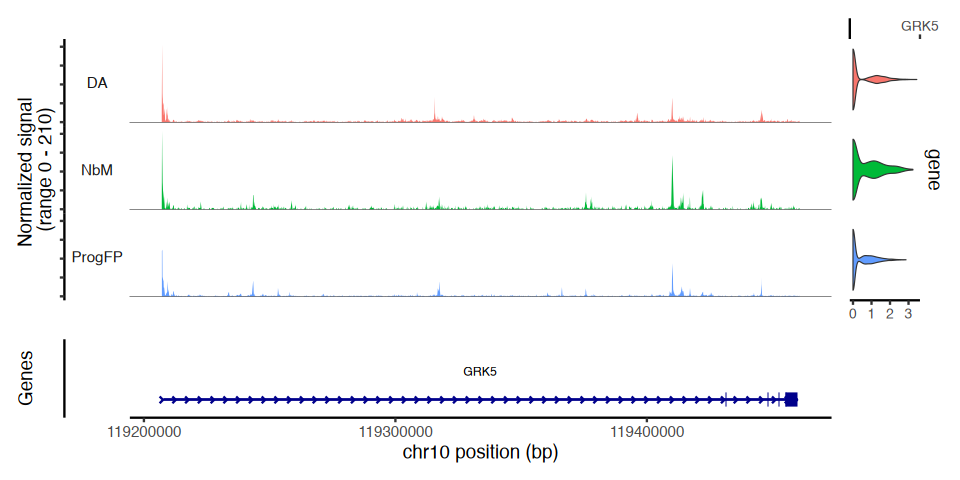

In [65]:
gene_marker = "GRK5"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
“Removed 29 rows containing missing values or values outside the scale range
(`geom_segment()`).”


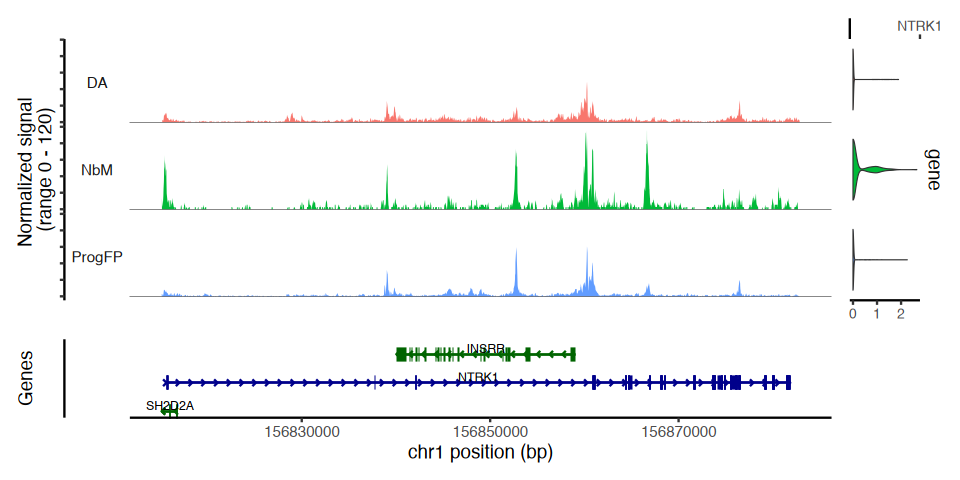

In [66]:
gene_marker = "NTRK1"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

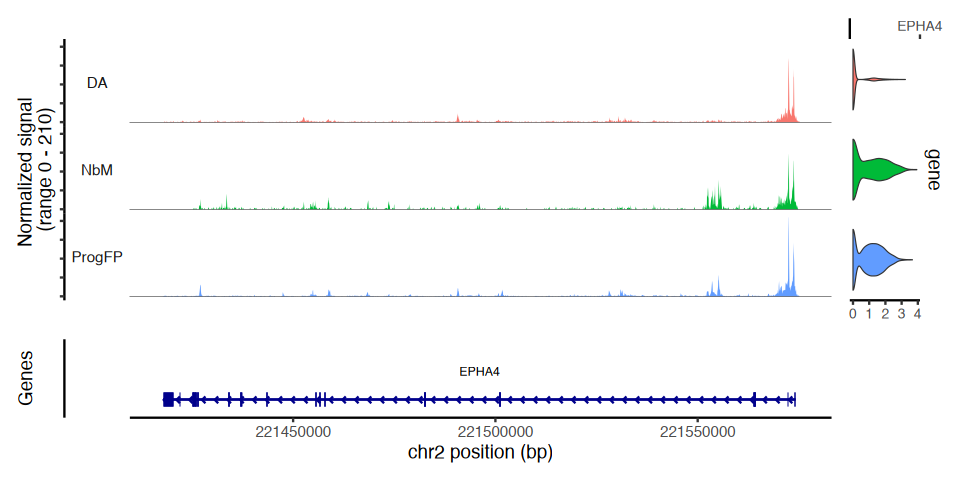

In [67]:
gene_marker = "EPHA4"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

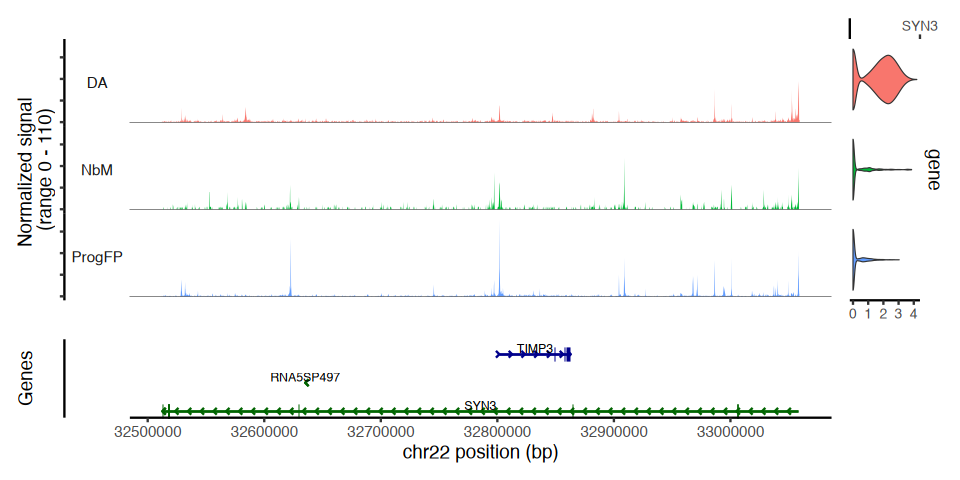

In [68]:
gene_marker = "SYN3"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_segment()`).”


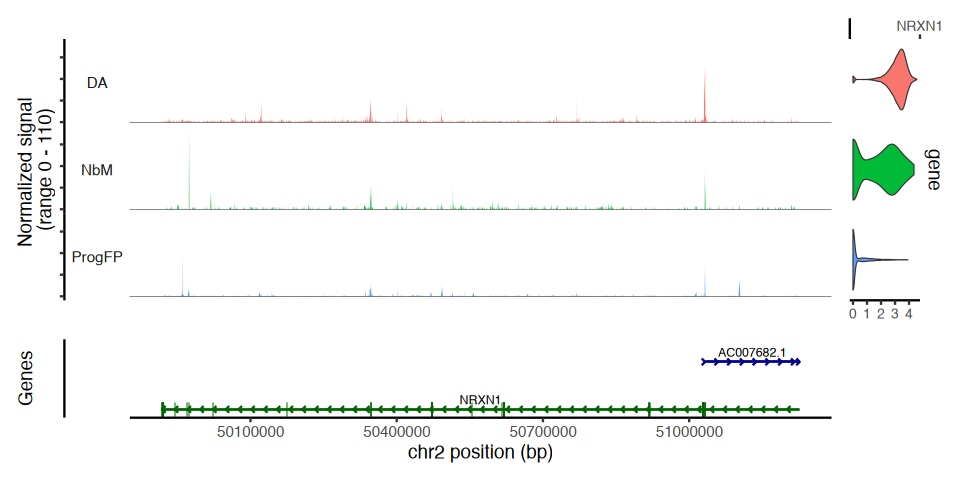

In [69]:
gene_marker = "NRXN1"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

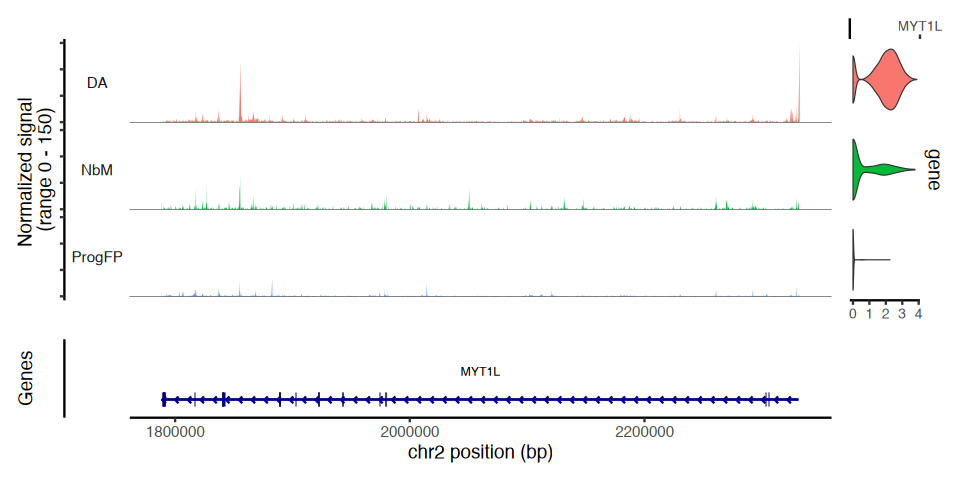

In [70]:
gene_marker = "MYT1L"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

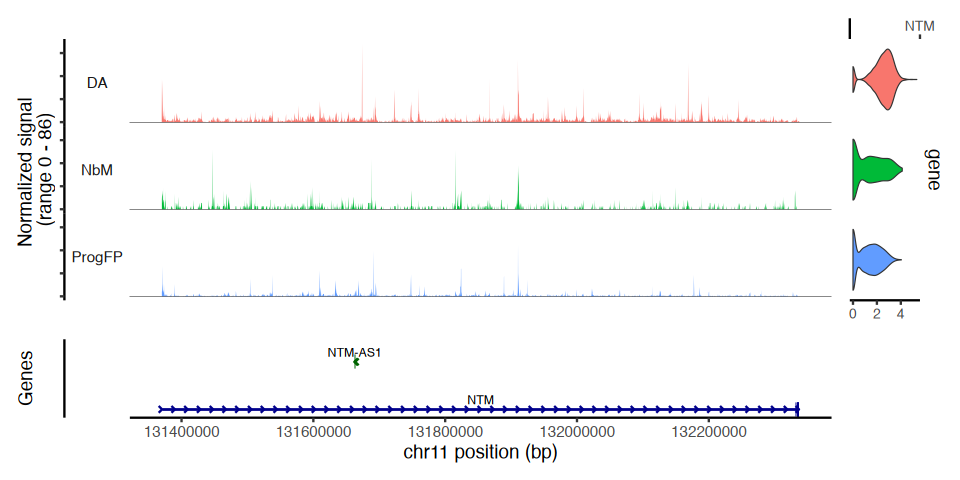

In [71]:
gene_marker = "NTM"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

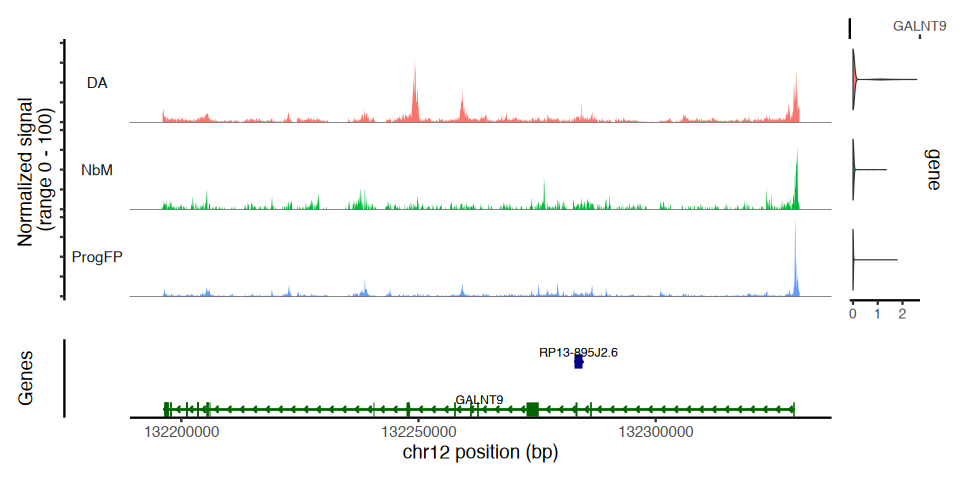

In [72]:
gene_marker = "GALNT9"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

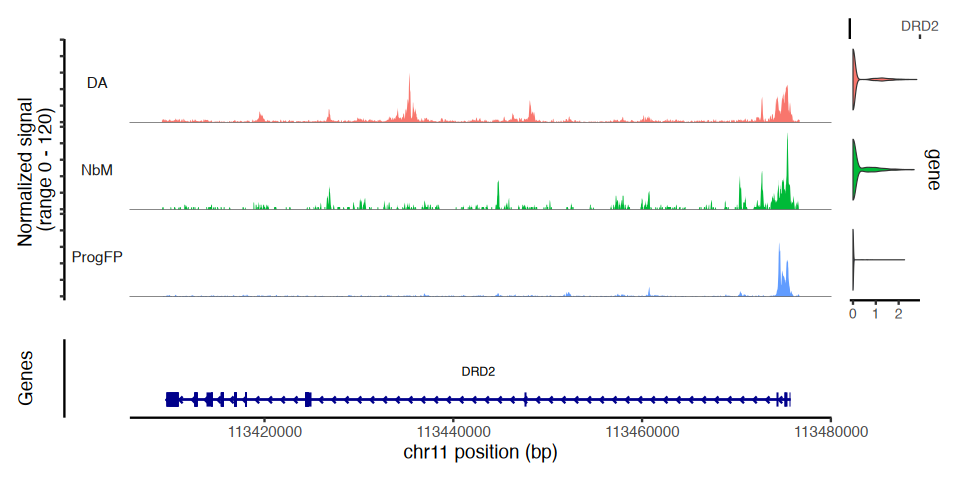

In [73]:
gene_marker = "DRD2"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

Warning message:
“Removed 31 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


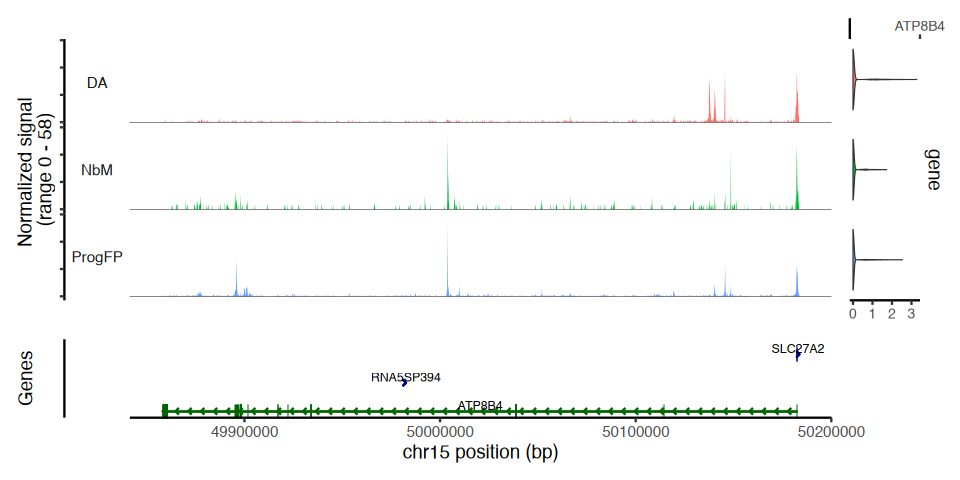

In [74]:
gene_marker = "ATP8B4"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)

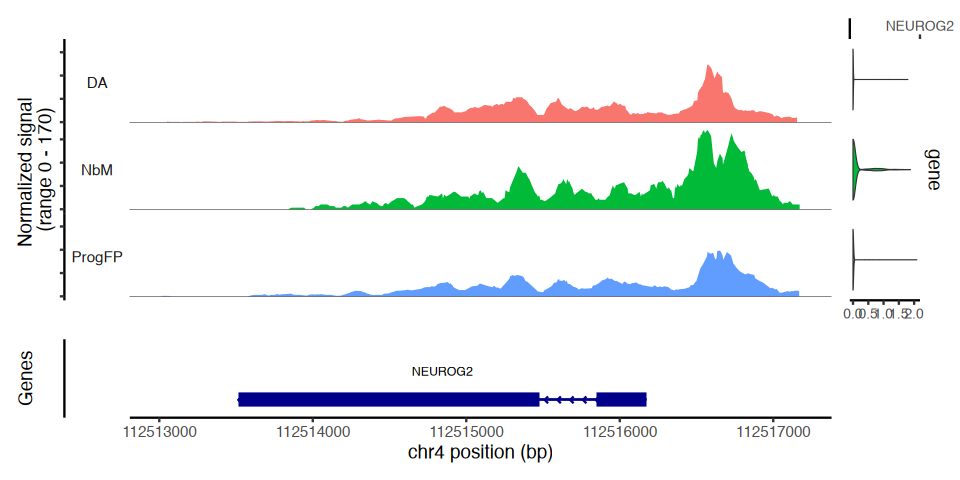

In [79]:
gene_marker = "NEUROG2"
options(repr.plot.width=8, repr.plot.height=4)
CoveragePlot(sec, region = gene_marker, features = gene_marker, annotation = TRUE, peaks = FALSE, links = FALSE,  tile = FALSE,
             expression.assay = "RNA",extend.upstream = 500, extend.downstream = 1000)